# 🏥 ICU Data Analysis with MIMIC-IV Demo v2.2

## 📌 Project Name

**"From Raw ICU Data to Research-Ready Insights"**

## 🎯 Objective

The goal of this project is to **design, clean, and prepare a research-ready dataset** from ICU patient records, enabling downstream analytics and machine learning applications.
We aim to:

* 🗂️ Aggregate clinical data from multiple hospital and ICU sources
* 🧹 Handle missing values and inconsistent entries
* 📊 Create patient-level feature sets ready for modeling
* 🔍 Enable exploratory analysis of ICU trends and patient outcomes

## 📂 Dataset Overview — *MIMIC-IV Clinical Database Demo v2.2*

[Find it here!](https://www.kaggle.com/datasets/montassarba/mimic-iv-clinical-database-demo-2-2)

This dataset is a **compact, de-identified sample** of the real MIMIC-IV database, curated for quick testing and prototyping without the heavy storage or access requirements of the full version.

It mirrors the **real hospital + ICU data structure** so any pipelines built here will seamlessly scale to the full dataset later.

### **What’s Inside?**

* **`icu/`** 🛏️ — ICU event data (vital signs, charted observations, procedures, fluid in/out logs)
* **`hosp/`** 🏥 — Hospital-wide data (patient demographics, admissions, labs, diagnoses, procedures)
* **`demo_subject_id.csv`** 🧾 — List of patient IDs included in this demo
* **Helper files** 📑 — `README.txt`, `LICENSE.txt`, and `SHA256SUMS.txt` for documentation and file checks

---

## 💡 Why Are We Doing This?

Healthcare datasets, especially ICU records, are **rich but messy**. They come from multiple systems and require careful processing before analysis.

By working with this **demo version**, we can:

* 🏗️ **Prototype** an end-to-end ETL (Extract–Transform–Load) pipeline
* 🧪 **Experiment** with feature engineering for patient outcome prediction
* ⚡ **Validate** our code without full-scale computation
* 📈 **Prepare** for larger research projects on the complete MIMIC-IV dataset

---

## 🚀 End Goal

By the end of this project, we will have:

1. **A clean, integrated patient-level dataset** combining ICU, hospital, and diagnosis data
2. **Descriptive statistics & visualizations** for ICU trends
3. **Ready-to-use features** for predictive modeling of patient outcomes

---


In [4]:
import kagglehub
import os
dataset_path = kagglehub.dataset_download("montassarba/mimic-iv-clinical-database-demo-2-2")
print("✅ Download complete. Dataset saved to:", dataset_path)

✅ Download complete. Dataset saved to: C:\Users\0132499s\.cache\kagglehub\datasets\montassarba\mimic-iv-clinical-database-demo-2-2\versions\1


In [ ]:
'''
Connectino via Google Colab

# STEP 0: Install kagglehub if not already installed
!pip install -q kagglehub

# STEP 1: Upload your Kaggle API key
from google.colab import files
print("📁 Please upload your kaggle.json file...")
uploaded = files.upload()

# STEP 2: Configure Kaggle credentials
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# STEP 3: Download the CBIS-DDSM dataset using kagglehub
import kagglehub
dataset_path = kagglehub.dataset_download("montassarba/mimic-iv-clinical-database-demo-2-2")
print("✅ Download complete. Dataset saved to:", dataset_path)
'''

📁 Please upload your kaggle.json file...


Saving kaggle.json to kaggle.json
✅ Download complete. Dataset saved to: /kaggle/input/mimic-iv-clinical-database-demo-2-2


## 📥 Data Loading & Table Selection

### 🔍 Step 1 — Exploring the Dataset Structure

We started by checking the **folder structure** of the dataset to understand how files are organized. The demo MIMIC-IV dataset contains multiple folders, each corresponding to different types of hospital or ICU data.

### 📂 Step 2 — Loading All Tables

We then **recursively scanned** the dataset directory to load all `.csv` and `.csv.gz` files into memory.

* Each file was stored as a **Pandas DataFrame** inside a dictionary called `tables`
* The dictionary keys are simply the table names (e.g., `"admissions"`, `"patients"`, `"labevents"`)
* This approach makes it easy to **access any dataset instantly** without reloading from disk

At the end of this step, ✅ **all tables were loaded and ready for exploration**.

### 🗂 Step 3 — Selecting the Most Relevant Tables

From the complete set of loaded tables, we identified the **most relevant** ones for our ICU analysis:

| Table Name            | Purpose                                                                  |
| --------------------- | ------------------------------------------------------------------------ |
| **patients** 🧍‍♂️    | Demographic information such as age, gender, and death date              |
| **admissions** 🏥     | Hospital admission details including admission/discharge times and types |
| **icustays** 🛏       | ICU-specific admissions, durations, and locations                        |
| **chartevents** 📋    | Time-stamped ICU observations like vitals and nursing notes              |
| **labevents** 🧪      | Laboratory test results for patients                                     |
| **outputevents** 💧   | Fluid output records (e.g., urine output, drainage)                      |
| **diagnoses\_icd** 🩺 | ICD-coded diagnoses for each admission                                   |

**Selection Criteria:**
We chose these tables because they:

1. Contain **core patient-level data** essential for ICU analytics
2. Include **temporal clinical measurements** (e.g., vitals, labs)
3. Cover **both hospital-wide and ICU-specific** information
4. Allow linking via shared patient and admission identifiers

---

In [5]:
print(os.listdir(dataset_path))

['mimic-iv-clinical-database-demo-2.2']


In [6]:
root_path = os.path.join(dataset_path, 'mimic-iv-clinical-database-demo-2.2')
print("Root folder contents:", os.listdir(root_path)[:10])

Root folder contents: ['demo_subject_id.csv', 'hosp', 'icu', 'LICENSE.txt', 'README.txt', 'SHA256SUMS.txt']


In [7]:
import pandas as pd
import glob

data_root = root_path

# Dictionary to store DataFrames
tables = {}

# Recursively search for all CSV and CSV.GZ files
for file_path in glob.glob(os.path.join(data_root, '**', '*.csv*'), recursive=True):
    file_name = os.path.splitext(os.path.basename(file_path))[0]
    print(f"📄 Loading {file_name} ...")
    tables[file_name] = pd.read_csv(file_path)

print(f"\n✅ Loaded {len(tables)} tables into 'tables' dictionary.")
print("\nExample table: admissions")
print(tables['admissions'].head())

📄 Loading demo_subject_id ...
📄 Loading admissions ...
📄 Loading diagnoses_icd ...
📄 Loading drgcodes ...
📄 Loading d_hcpcs ...
📄 Loading d_icd_diagnoses ...
📄 Loading d_icd_procedures ...
📄 Loading d_labitems ...
📄 Loading emar ...
📄 Loading emar_detail ...


C:\Users\0132499s\AppData\Local\Temp\ipykernel_17500\893507002.py:13: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,15,16,17,18,21,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  tables[file_name] = pd.read_csv(file_path)


📄 Loading hcpcsevents ...
📄 Loading labevents ...
📄 Loading microbiologyevents ...
📄 Loading omr ...
📄 Loading patients ...
📄 Loading pharmacy ...
📄 Loading poe ...
📄 Loading poe_detail ...
📄 Loading prescriptions ...
📄 Loading procedures_icd ...
📄 Loading provider ...
📄 Loading services ...
📄 Loading transfers ...
📄 Loading caregiver ...
📄 Loading chartevents ...
📄 Loading datetimeevents ...
📄 Loading d_items ...
📄 Loading icustays ...
📄 Loading ingredientevents ...
📄 Loading inputevents ...
📄 Loading outputevents ...
📄 Loading procedureevents ...

✅ Loaded 32 tables into 'tables' dictionary.

Example table: admissions
   subject_id   hadm_id            admittime            dischtime  \
0    10004235  24181354  2196-02-24 14:38:00  2196-03-04 14:02:00   
1    10009628  25926192  2153-09-17 17:08:00  2153-09-25 13:20:00   
2    10018081  23983182  2134-08-18 02:02:00  2134-08-23 19:35:00   
3    10006053  22942076  2111-11-13 23:39:00  2111-11-15 17:20:00   
4    10031404  21606243  21

In [8]:
tables['admissions'].head(2)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0


In [9]:
patients = tables['patients']
admissions	= tables['admissions']
icustays	= tables['icustays']
chartevents	= tables['chartevents']
labevents	= tables['labevents']
outputevents	= tables['outputevents']
diagnoses_icd = tables['diagnoses_icd']

In [10]:
labevents.head(2)

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,172061,10014354,29600294.0,1808066,51277,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,15.4,15.40,%,10.5,15.5,NaN,ROUTINE,NaN
1,172062,10014354,29600294.0,1808066,51279,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,3.35,3.35,m/uL,4.6,6.1,abnormal,ROUTINE,NaN


## 🛠 Data Preparation & Feature Engineering

This section describes how raw ICU and hospital data was **processed, aggregated, and merged** into a single dataset ready for modeling.

---

### 📅 Step 0 — Converting Time Columns

Before any filtering or aggregation, all **timestamp columns** were converted into a proper `datetime` format.

* Ensures **accurate time comparisons** (e.g., to filter lab results within ICU stays)
* Avoids errors due to inconsistent date formats
* Key tables with converted times: `chartevents`, `labevents`, `outputevents`, `icustays`, and `admissions`

---

### ❤️ Step 1 — Aggregating Vital Signs (`chartevents`)

We extracted and summarized **key vital signs** using specific `itemid` values:

* **Heart Rate** (`itemid=220045`) → average during the ICU stay
* **Respiratory Rate** (`itemid=220210`) → average during the ICU stay
* **Temperature** (`itemid=223762`, °C) → maximum recorded during the ICU stay

Each measure was grouped by `stay_id` and stored in a separate aggregated DataFrame.

---

### 🧪 Step 2 — Aggregating Lab Results (`labevents`)

Lab results were linked to ICU stays and filtered to **only include measurements taken between `intime` and `outtime`**.
We focused on:

* **Creatinine** (`itemid=50912`) → maximum value during stay (kidney function)
* **Sodium** (`itemid=50983`) → average value during stay (electrolyte balance)

---

### 💧 Step 3 — Aggregating Fluid Output (`outputevents`)

* Summed all fluid output values for each ICU stay → **`total_output`**
* This helps estimate fluid balance and patient stability.

---

### 🩺 Step 4 — Counting Diagnoses (`diagnoses_icd`)

* Counted **ICD diagnosis codes** per hospital admission (`hadm_id`)
* Result stored as **`num_diagnoses`**, a measure of comorbidity/burden of illness.

---

### 🏥 Step 5 — Merging Patient & Admission Data

The **ICU stay table (`icustays`)** was merged with:

* `admissions` → hospital admission details
* `patients` → demographic data (gender, age, race, etc.)
* `diag_agg` → diagnosis count per admission

This produced a base **patient-admission-ICU dataset**.

---

### 🔗 Step 6 — Combining All Features into One Dataset

All aggregated features from Steps 1–4 were merged with the ICU info (Step 5) to produce a **master table**.

---

### 🎯 Step 7 — Selecting Relevant Features for Modeling

We kept only the most useful columns for predictive modeling, such as:

* **Patient Info**: gender, age, admission type, race, marital status
* **ICU Info**: first care unit, length of stay, hospital outcome flag
* **Vitals & Labs**: heart rate, respiratory rate, temperature, creatinine, sodium
* **Other Clinical**: total fluid output, number of diagnoses

Sensitive fields and unnecessary timestamps were excluded for **privacy and efficiency**.

---

✅ **Final Output:**
A clean, integrated dataset where each row represents a **unique ICU stay**, with demographics, clinical measurements, and outcomes — ready for machine learning.

---


In [11]:
# Convert timestamps to datetime for filtering
chartevents['charttime'] = pd.to_datetime(chartevents['charttime'], errors='coerce')
labevents['charttime'] = pd.to_datetime(labevents['charttime'], errors='coerce')
outputevents['charttime'] = pd.to_datetime(outputevents['charttime'], errors='coerce')
icustays['intime'] = pd.to_datetime(icustays['intime'], errors='coerce')
icustays['outtime'] = pd.to_datetime(icustays['outtime'], errors='coerce')
admissions['admittime'] = pd.to_datetime(admissions['admittime'], errors='coerce')
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'], errors='coerce')
admissions['deathtime'] = pd.to_datetime(admissions['deathtime'], errors='coerce')
admissions['edregtime'] = pd.to_datetime(admissions['edregtime'], errors='coerce')
admissions['edouttime'] = pd.to_datetime(admissions['edouttime'], errors='coerce')

# STEP 1: Aggregate vital signs (chartevents) - filter by itemid and agg on valuenum
# Heart rate (itemid=220045): mean
hr_agg = (
    chartevents[chartevents['itemid'] == 220045]
    .groupby('stay_id', as_index=False)
    .agg({'valuenum': 'mean'})
    .rename(columns={'valuenum': 'heart_rate_mean'})
)

# Respiratory rate (itemid=220210): mean
rr_agg = (
    chartevents[chartevents['itemid'] == 220210]
    .groupby('stay_id', as_index=False)
    .agg({'valuenum': 'mean'})
    .rename(columns={'valuenum': 'resp_rate_mean'})
)

# Temperature (itemid=223762 for Celsius): max
temp_agg = (
    chartevents[chartevents['itemid'] == 223762]
    .groupby('stay_id', as_index=False)
    .agg({'valuenum': 'max'})
    .rename(columns={'valuenum': 'temperature_max'})
)

# STEP 2: Aggregate lab results (labevents) - first assign stay_id by filtering during ICU stay, then filter by itemid and agg on valuenum
# Merge labevents with icustays to add intime/outtime
labs_icu = pd.merge(labevents, icustays[['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime']], on=['subject_id', 'hadm_id'], how='left')

# Filter to labs during ICU stay
labs_icu = labs_icu[(labs_icu['charttime'] >= labs_icu['intime']) & (labs_icu['charttime'] <= labs_icu['outtime'])]

# Creatinine (itemid=50912): max
creat_agg = (
    labs_icu[labs_icu['itemid'] == 50912]
    .groupby('stay_id', as_index=False)
    .agg({'valuenum': 'max'})
    .rename(columns={'valuenum': 'creatinine_max'})
)

# Sodium (itemid=50983): mean
sodium_agg = (
    labs_icu[labs_icu['itemid'] == 50983]
    .groupby('stay_id', as_index=False)
    .agg({'valuenum': 'mean'})
    .rename(columns={'valuenum': 'sodium_mean'})
)

# STEP 3: Aggregate output events (sum value for total fluid output; no itemid filter needed)
output_agg = (
    outputevents
    .groupby('stay_id', as_index=False)
    .agg({'value': 'sum'})
    .rename(columns={'value': 'total_output'})
)

# STEP 4: Aggregate diagnoses (count icd_code; per hadm_id)
diag_agg = (
    diagnoses_icd
    .groupby('hadm_id', as_index=False)
    .agg({'icd_code': 'count'})
    .rename(columns={'icd_code': 'num_diagnoses'})
)

# STEP 5: Merge patient, admission, and ICU stay info, including diagnoses on hadm_id
icu_info = (
    icustays
    .merge(admissions, on=['subject_id', 'hadm_id'], how='left')
    .merge(patients, on='subject_id', how='left')
    .merge(diag_agg, on='hadm_id', how='left')
)

# STEP 6: Merge aggregated features (vitals, labs, output on stay_id)
master_df = (
    icu_info
    .merge(hr_agg, on='stay_id', how='left')
    .merge(rr_agg, on='stay_id', how='left')
    .merge(temp_agg, on='stay_id', how='left')
    .merge(creat_agg, on='stay_id', how='left')
    .merge(sodium_agg, on='stay_id', how='left')
    .merge(output_agg, on='stay_id', how='left')
)

# Select relevant columns for ML, based on explicitly mentioned columns (drop sensitive/timestamps/PHI if needed for anonymization)
master_df = master_df[[
    'stay_id', 'subject_id', 'hadm_id',  # Keys (anonymize later)
    'gender', 'anchor_age', 'admission_type', 'insurance', 'language', 'marital_status', 'race',
    'first_careunit', 'los', 'hospital_expire_flag',  # Target
    'heart_rate_mean', 'resp_rate_mean', 'temperature_max', 'creatinine_max',
    'sodium_mean', 'total_output', 'num_diagnoses'
]]

print("Final dataset shape:", master_df.shape)
master_df.head()

Final dataset shape: (140, 20)


,stay_id,subject_id,hadm_id,gender,anchor_age,admission_type,insurance,language,marital_status,race,first_careunit,los,hospital_expire_flag,heart_rate_mean,resp_rate_mean,temperature_max,creatinine_max,sodium_mean,total_output,num_diagnoses
0,31269608,10018328,23786647,F,83,SURGICAL SAME DAY ADMISSION,Other,ENGLISH,DIVORCED,WHITE,Neuro Stepdown,7.702512,0,68.278075,18.777174,NaN,0.8,137.166667,11037.0,16
1,37509585,10020187,24104168,F,63,OBSERVATION ADMIT,Other,?,MARRIED,HISPANIC/LATINO - SALVADORAN,Neuro Surgical Intensive Care Unit (Neuro SICU),5.452662,0,66.833333,17.289474,NaN,0.6,140.000000,14150.0,5
2,32554129,10020187,26842957,F,63,SURGICAL SAME DAY ADMISSION,Other,?,MARRIED,HISPANIC/LATINO - SALVADORAN,Neuro Intermediate,0.872685,0,62.600000,14.611111,NaN,0.5,143.000000,2650.0,9
3,31338022,10012853,27882036,F,91,EW EMER.,Medicare,ENGLISH,WIDOWED,BLACK/AFRICAN AMERICAN,Trauma SICU (TSICU),3.766725,0,73.358696,21.118280,NaN,1.0,142.250000,5580.0,30
4,32145159,10020740,25826145,M,56,EW EMER.,Other,ENGLISH,SINGLE,WHITE,Trauma SICU (TSICU),1.037106,0,87.058824,19.914286,NaN,0.9,140.000000,2860.0,20


In [12]:
master_df.columns

Index(['stay_id', 'subject_id', 'hadm_id', 'gender', 'anchor_age',
       'admission_type', 'insurance', 'language', 'marital_status', 'race',
       'first_careunit', 'los', 'hospital_expire_flag', 'heart_rate_mean',
       'resp_rate_mean', 'temperature_max', 'creatinine_max', 'sodium_mean',
       'total_output', 'num_diagnoses'],
      dtype='object')

## 🧹  Data Cleaning & Preprocessing

In this section, we perform **data cleaning** to ensure our dataset is **accurate, consistent, and ready** for analysis or machine learning tasks.
The following steps were taken:

---

### 🔍 Step 8: Handle Special Missing Indicators

In the MIMIC-IV dataset, unknown values in categorical columns may be represented by `'?'`.
We replaced all `'?'` values with `NaN` to standardize missing data handling:

* **Categorical columns:** `gender`, `admission_type`, `insurance`, `language`, `marital_status`, `race`, `first_careunit`
* **Numerical columns:** Checked and replaced `'?'` (unlikely but handled for completeness)

---

### 📏 Step 9: Outlier Handling

To ensure **physiologically plausible values**, we defined ranges based on MIMIC-IV literature and ICU clinical norms.
Any value outside these ranges was set to `NaN` for later imputation:

| Variable          | Min  | Max   | Units       | Reasoning                  |
| ----------------- | ---- | ----- | ----------- | -------------------------- |
| `heart_rate_mean` | 25   | 225   | bpm         | ICU extreme values allowed |
| `resp_rate_mean`  | 7    | 40    | breaths/min | Clinical norms             |
| `temperature_max` | 30   | 45    | °C          | Physiological limits       |
| `creatinine_max`  | 0.1  | 15    | mg/dL       | ICU ranges                 |
| `sodium_mean`     | 115  | 165   | mEq/L       | Catch implausible values   |
| `total_output`    | 0    | 50000 | mL          | Arbitrary safe limit       |
| `anchor_age`      | 18   | 100   | years       | Adult population           |
| `los`             | 0.01 | 100   | days        | Positive & reasonable      |
| `num_diagnoses`   | 0    | 100   | count       | Reasonable limit           |

---

### 🛠 Step 10: Handling Missing Values

After detecting missing values, we used **imputation** to fill them:

* **Numerical columns:** Median imputation (robust for skewed ICU data)
* **Categorical columns:** Filled with `"Unknown"` to preserve category consistency

---

### 🛡 Step 11: Anonymization

To comply with **HIPAA de-identification guidelines**, we removed direct identifiers:

* Dropped: `subject_id`, `hadm_id`
* Retained: `stay_id` for indexing/querying
* Sensitive categorical fields like race/language could be generalized if required

---

✅ **At the end of this process**, the dataset is **clean, de-identified, and standardized**, ready for analysis or machine learning models.

---

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer

# STEP 8: Data Cleaning - Handle Special Missing Indicators (e.g., '?' in MIMIC-IV for unknown)
categorical_cols = [
    'gender', 'admission_type', 'insurance', 'language', 'marital_status', 'race', 'first_careunit'
]
master_df[categorical_cols] = master_df[categorical_cols].replace('?', np.nan)

# Also check for any '?' in numerical cols
numerical_cols = [
    'anchor_age', 'los', 'heart_rate_mean', 'resp_rate_mean', 'temperature_max',
    'creatinine_max', 'sodium_mean', 'total_output', 'num_diagnoses'
]
master_df[numerical_cols] = master_df[numerical_cols].replace('?', np.nan)

# STEP 9: Data Cleaning - Outlier Handling
# Define plausible ranges based on physiological limits from MIMIC-IV literature
outlier_ranges = {
    'heart_rate_mean': (25, 225),       # bpm, allowing for extremes in ICU
    'resp_rate_mean': (7, 40),          # breaths/min
    'temperature_max': (30, 45),        # Celsius
    'creatinine_max': (0.1, 15),        # mg/dL, common ICU range
    'sodium_mean': (115, 165),          # mEq/L, to catch implausible values
    'total_output': (0, 50000),         # mL, arbitrary upper limit for total fluid output
    'anchor_age': (18, 100),            # Years, MIMIC-IV adults, capped ~89 but allow buffer
    'los': (0.01, 100),                 # Days, positive and reasonable upper
    'num_diagnoses': (0, 100)           # Count, reasonable upper limit
}

# Set values outside ranges to NaN (to be imputed later)
for col, (min_val, max_val) in outlier_ranges.items():
    if col in master_df.columns:
        master_df.loc[(master_df[col] < min_val) | (master_df[col] > max_val), col] = np.nan

# STEP 10: Data Cleaning - Handle Missing Values
# Impute numerical columns with median (robust to skewness in ICU data)
imputer_num = SimpleImputer(strategy='median')
master_df[numerical_cols] = imputer_num.fit_transform(master_df[numerical_cols])

# Impute categorical columns with 'Unknown' (or mode if preferred, but constant for new category)
imputer_cat = SimpleImputer(strategy='constant', fill_value='Unknown')
master_df[categorical_cols] = imputer_cat.fit_transform(master_df[categorical_cols])

# STEP 11: Anonymization - Strip PHI
# Remove direct identifiers (subject_id, hadm_id); keep stay_id for indexing/querying
# No dates left, anchor_age already shifted/anonymized in MIMIC-IV
if 'subject_id' in master_df.columns:
    master_df.drop(columns=['subject_id'], inplace=True)
if 'hadm_id' in master_df.columns:
    master_df.drop(columns=['hadm_id'], inplace=True)

# STEP 13: Output cleaned results
print("Cleaned dataset shape:", master_df.shape)
master_df.head()

Cleaned dataset shape: (140, 18)


,stay_id,gender,anchor_age,admission_type,insurance,language,marital_status,race,first_careunit,los,hospital_expire_flag,heart_rate_mean,resp_rate_mean,temperature_max,creatinine_max,sodium_mean,total_output,num_diagnoses
0,31269608,F,83.0,SURGICAL SAME DAY ADMISSION,Other,ENGLISH,DIVORCED,WHITE,Neuro Stepdown,7.702512,0,68.278075,18.777174,37.35,0.8,137.166667,11037.0,16.0
1,37509585,F,63.0,OBSERVATION ADMIT,Other,Unknown,MARRIED,HISPANIC/LATINO - SALVADORAN,Neuro Surgical Intensive Care Unit (Neuro SICU),5.452662,0,66.833333,17.289474,37.35,0.6,140.000000,14150.0,5.0
2,32554129,F,63.0,SURGICAL SAME DAY ADMISSION,Other,Unknown,MARRIED,HISPANIC/LATINO - SALVADORAN,Neuro Intermediate,0.872685,0,62.600000,14.611111,37.35,0.5,143.000000,2650.0,9.0
3,31338022,F,91.0,EW EMER.,Medicare,ENGLISH,WIDOWED,BLACK/AFRICAN AMERICAN,Trauma SICU (TSICU),3.766725,0,73.358696,21.118280,37.35,1.0,142.250000,5580.0,30.0
4,32145159,M,56.0,EW EMER.,Other,ENGLISH,SINGLE,WHITE,Trauma SICU (TSICU),1.037106,0,87.058824,19.914286,37.35,0.9,140.000000,2860.0,20.0


### 🛡️ Step 14: Data Anonymization – Handling Quasi-Identifiers

Quasi-identifiers like **race**, **language**, and **marital\_status** are not direct personal identifiers but can still be used to re-identify someone when combined with other data.
To reduce this risk, we **grouped all rare categories** (those appearing in less than 5% of records) into a single category called **"Other"**. This ensures that no individual stands out due to rare demographic characteristics.

---

### 🧹 Step 15: Verifying Removal of PHI (Protected Health Information)

Direct identifiers such as **subject IDs** and **hospital admission IDs** were removed entirely from the dataset.
This step guarantees that **no personally identifiable information** is present, while keeping a **synthetic stay ID** for indexing and data linking in our analysis.

---

### 🔍 Step 16: Final Verification of Sensitive Fields

We inspected categorical columns such as **gender**, **insurance type**, and **first care unit** to ensure they do not have **uniquely identifying values**.
Any field with very few categories was checked manually to confirm it’s safe for use in research.

---

### 📦 Step 17: Final Anonymized Dataset

At this stage, the dataset is **fully anonymized and privacy-compliant**, retaining only the features necessary for analysis.
This ensures we can confidently use it for **machine learning and statistical modeling** without risking patient confidentiality.

---

In [14]:
import pandas as pd
import numpy as np

# STEP 14: Data Anonymization - Handle Quasi-Identifiers
# Define columns that may pose re-identification risk
quasi_identifiers = ['race', 'language', 'marital_status']

# Group rare categories (<5% frequency) into 'Other'
for col in quasi_identifiers:
    if col in master_df.columns:
        # Calculate frequency of each category
        value_counts = master_df[col].value_counts(normalize=True)
        # Identify categories with <5% frequency
        rare_categories = value_counts[value_counts < 0.05].index
        # Replace rare categories with 'Other'
        master_df.loc[master_df[col].isin(rare_categories), col] = 'Other'
        print(f"Grouped rare categories in {col} to 'Other'")

# STEP 15: Verify PHI Removal
# Ensure no direct identifiers remain (subject_id, hadm_id already dropped)
phi_columns = ['subject_id', 'hadm_id']
for col in phi_columns:
    if col in master_df.columns:
        master_df.drop(columns=[col], inplace=True)
        print(f"Dropped PHI column: {col}")

#STEP 16: Final Verification
# Ensure sensitive columns are safe (e.g., no unique values in categoricals)
for col in ['gender', 'admission_type', 'insurance', 'language', 'marital_status', 'race', 'first_careunit']:
    if col in master_df.columns:
        unique_count = master_df[col].nunique()
        print(f"Unique values in {col}: {unique_count}")
        if unique_count < 10:  # Arbitrary threshold for inspection
            print(f"Categories in {col}: {master_df[col].unique()}")

# STEP 17: Output anonymized results
print("Anonymized dataset shape:", master_df.shape)
master_df.head()

Grouped rare categories in race to 'Other'
Grouped rare categories in language to 'Other'
Grouped rare categories in marital_status to 'Other'
Unique values in gender: 2
Categories in gender: ['F' 'M']
Unique values in admission_type: 6
Categories in admission_type: ['SURGICAL SAME DAY ADMISSION' 'OBSERVATION ADMIT' 'EW EMER.' 'URGENT'
 'DIRECT EMER.' 'ELECTIVE']
Unique values in insurance: 3
Categories in insurance: ['Other' 'Medicare' 'Medicaid']
Unique values in language: 2
Categories in language: ['ENGLISH' 'Unknown']
Unique values in marital_status: 5
Categories in marital_status: ['DIVORCED' 'MARRIED' 'WIDOWED' 'SINGLE' 'Unknown']
Unique values in race: 4
Categories in race: ['WHITE' 'Other' 'BLACK/AFRICAN AMERICAN' 'UNKNOWN']
Unique values in first_careunit: 9
Categories in first_careunit: ['Neuro Stepdown' 'Neuro Surgical Intensive Care Unit (Neuro SICU)'
 'Neuro Intermediate' 'Trauma SICU (TSICU)' 'Coronary Care Unit (CCU)'
 'Medical Intensive Care Unit (MICU)'
 'Cardiac Vascu

,stay_id,gender,anchor_age,admission_type,insurance,language,marital_status,race,first_careunit,los,hospital_expire_flag,heart_rate_mean,resp_rate_mean,temperature_max,creatinine_max,sodium_mean,total_output,num_diagnoses
0,31269608,F,83.0,SURGICAL SAME DAY ADMISSION,Other,ENGLISH,DIVORCED,WHITE,Neuro Stepdown,7.702512,0,68.278075,18.777174,37.35,0.8,137.166667,11037.0,16.0
1,37509585,F,63.0,OBSERVATION ADMIT,Other,Unknown,MARRIED,Other,Neuro Surgical Intensive Care Unit (Neuro SICU),5.452662,0,66.833333,17.289474,37.35,0.6,140.000000,14150.0,5.0
2,32554129,F,63.0,SURGICAL SAME DAY ADMISSION,Other,Unknown,MARRIED,Other,Neuro Intermediate,0.872685,0,62.600000,14.611111,37.35,0.5,143.000000,2650.0,9.0
3,31338022,F,91.0,EW EMER.,Medicare,ENGLISH,WIDOWED,BLACK/AFRICAN AMERICAN,Trauma SICU (TSICU),3.766725,0,73.358696,21.118280,37.35,1.0,142.250000,5580.0,30.0
4,32145159,M,56.0,EW EMER.,Other,ENGLISH,SINGLE,WHITE,Trauma SICU (TSICU),1.037106,0,87.058824,19.914286,37.35,0.9,140.000000,2860.0,20.0


In [15]:
print("Missing values per column:\n", master_df.isna().sum())
print("Any '?' values:\n", (master_df == '?').sum())

Missing values per column:
 stay_id                 0
gender                  0
anchor_age              0
admission_type          0
insurance               0
language                0
marital_status          0
race                    0
first_careunit          0
los                     0
hospital_expire_flag    0
heart_rate_mean         0
resp_rate_mean          0
temperature_max         0
creatinine_max          0
sodium_mean             0
total_output            0
num_diagnoses           0
dtype: int64
Any '?' values:
 stay_id                 0
gender                  0
anchor_age              0
admission_type          0
insurance               0
language                0
marital_status          0
race                    0
first_careunit          0
los                     0
hospital_expire_flag    0
heart_rate_mean         0
resp_rate_mean          0
temperature_max         0
creatinine_max          0
sodium_mean             0
total_output            0
num_diagnoses           0
dtype:

## 🔄 Step 19-23: Data Transformation & Standardization for ICU Dataset

In this step, we perform **data transformation** to convert our cleaned and anonymized dataset into a standardized ICU schema. This prepares the data for downstream analysis and machine learning tasks.

---

### 🗂️ Define Standardized ICU Schema

We specify a structured schema that outlines each variable’s data type and description, ensuring consistency and clarity across the dataset.

* Unique identifiers (`stay_id`)
* Demographics (gender, age, race, marital status, language)
* Admission details (type, insurance, ICU care unit)
* Clinical metrics (heart rate, respiratory rate, temperature, labs)
* Outcomes (length of stay, mortality flag)
* Other features (number of diagnoses, fluid output)

---

### 🧩 One-Hot Encoding of Categorical Variables

Categorical features such as admission type, insurance, language, marital status, race, and ICU unit are converted into one-hot encoded binary columns.

* This allows machine learning algorithms to interpret categorical data effectively.
* Gender is handled separately as two binary columns: `gender_F` and `gender_M` for female and male, respectively.

---

### 🔢 Enforce Correct Data Types

Each column is explicitly cast to the data type specified in the schema (e.g., `int32`, `float64`, or `category`).

* This helps with memory efficiency and prevents type-related errors during analysis.
* Missing expected columns are added with zeros to maintain schema integrity.

---

### 🧮 Reorder and Clean Columns

The dataframe columns are reordered to exactly match the schema order for consistency.

* Any extra one-hot encoded columns not in the schema are dropped to avoid noise.

---

### 📊 Output and Verify

We print the transformed dataset’s shape and provide a summary of each column with its description and type.

* A quick glimpse of the first few rows confirms the success of the transformation.

---

This step ensures your ICU dataset is clean, standardized, and ready for advanced exploratory analysis or machine learning modeling. 🚀

---

In [16]:
# STEP 19: Transformation - Convert to Standardized ICU Schema

# Define the standardized schema with metadata
icu_schema = {
    'stay_id': {'type': 'int64', 'description': 'Unique ICU stay identifier (primary key)'},
    'gender_F': {'type': 'int32', 'description': 'Female gender (1 if F, 0 otherwise)'},
    'gender_M': {'type': 'int32', 'description': 'Male gender (1 if M, 0 otherwise)'},
    'anchor_age': {'type': 'float64', 'description': 'Patient age at admission (years, anonymized)'},
    'admission_type': {'type': 'category', 'description': 'Type of hospital admission (one-hot encoded)'},
    'insurance': {'type': 'category', 'description': 'Insurance type (one-hot encoded)'},
    'language': {'type': 'category', 'description': 'Patient primary language (one-hot encoded)'},
    'marital_status': {'type': 'category', 'description': 'Marital status (one-hot encoded)'},
    'race': {'type': 'category', 'description': 'Patient race/ethnicity (one-hot encoded)'},
    'first_careunit': {'type': 'category', 'description': 'First ICU care unit (one-hot encoded)'},
    'los': {'type': 'float64', 'description': 'Length of ICU stay (days)'},
    'hospital_expire_flag': {'type': 'int32', 'description': 'In-hospital mortality (1 if died, 0 otherwise)'},
    'heart_rate_mean': {'type': 'float64', 'description': 'Mean heart rate during stay (bpm)'},
    'resp_rate_mean': {'type': 'float64', 'description': 'Mean respiratory rate during stay (breaths/min)'},
    'temperature_max': {'type': 'float64', 'description': 'Max temperature during stay (Celsius)'},
    'creatinine_max': {'type': 'float64', 'description': 'Max creatinine during stay (mg/dL)'},
    'sodium_mean': {'type': 'float64', 'description': 'Mean sodium during stay (mEq/L)'},
    'total_output': {'type': 'float64', 'description': 'Total fluid output during stay (mL)'},
    'num_diagnoses': {'type': 'int32', 'description': 'Number of ICD diagnoses for admission'}
}

# STEP 20: Encode Categorical Variables (One-Hot Encoding for ML)
categorical_cols = ['admission_type', 'insurance', 'language', 'marital_status', 'race', 'first_careunit']

# One-hot encode categorical columns
master_df_encoded = pd.get_dummies(master_df, columns=categorical_cols, prefix=categorical_cols, dtype='int32')

# Handle gender separately (binary, convert to F/M columns)
master_df_encoded['gender_F'] = (master_df['gender'] == 'F').astype('int32')
master_df_encoded['gender_M'] = (master_df['gender'] == 'M').astype('int32')
master_df_encoded.drop(columns=['gender'], inplace=True)

# STEP 21: Enforce Data Types
# Convert columns to specified types in the schema
for col, metadata in icu_schema.items():
    if col in master_df_encoded.columns:
        master_df_encoded[col] = master_df_encoded[col].astype(metadata['type'])
    elif col not in ['gender_F', 'gender_M'] and col not in master_df_encoded.columns:
        # Warn if expected column is missing (except gender, handled above)
        print(f"Warning: Column {col} not found in encoded DataFrame")

# Ensure all columns are present
for col in icu_schema.keys():
    if col not in master_df_encoded.columns:
        master_df_encoded[col] = 0  # Add missing categorical columns as zeros
        master_df_encoded[col] = master_df_encoded[col].astype(icu_schema[col]['type'])

# STEP 22: Reorder Columns to Match Schema
# Include only columns defined in schema
schema_columns = list(icu_schema.keys())
extra_columns = [col for col in master_df_encoded.columns if col not in schema_columns]
if extra_columns:
    print(f"Dropping extra one-hot columns: {extra_columns}")
    master_df_encoded.drop(columns=extra_columns, inplace=True)

# Reorder to match schema
master_df_encoded = master_df_encoded[schema_columns]

# STEP 23: Output Transformed Results
print("Transformed dataset shape:", master_df_encoded.shape)
print("\nSchema Description:")
for col, metadata in icu_schema.items():
    print(f"{col}: {metadata['description']} ({metadata['type']})")
master_df_encoded.head()

Dropping extra one-hot columns: ['admission_type_DIRECT EMER.', 'admission_type_ELECTIVE', 'admission_type_EW EMER.', 'admission_type_OBSERVATION ADMIT', 'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT', 'insurance_Medicaid', 'insurance_Medicare', 'insurance_Other', 'language_ENGLISH', 'language_Unknown', 'marital_status_DIVORCED', 'marital_status_MARRIED', 'marital_status_SINGLE', 'marital_status_Unknown', 'marital_status_WIDOWED', 'race_BLACK/AFRICAN AMERICAN', 'race_Other', 'race_UNKNOWN', 'race_WHITE', 'first_careunit_Cardiac Vascular Intensive Care Unit (CVICU)', 'first_careunit_Coronary Care Unit (CCU)', 'first_careunit_Medical Intensive Care Unit (MICU)', 'first_careunit_Medical/Surgical Intensive Care Unit (MICU/SICU)', 'first_careunit_Neuro Intermediate', 'first_careunit_Neuro Stepdown', 'first_careunit_Neuro Surgical Intensive Care Unit (Neuro SICU)', 'first_careunit_Surgical Intensive Care Unit (SICU)', 'first_careunit_Trauma SICU (TSICU)']
Transformed d

,stay_id,gender_F,gender_M,anchor_age,admission_type,insurance,language,marital_status,race,first_careunit,los,hospital_expire_flag,heart_rate_mean,resp_rate_mean,temperature_max,creatinine_max,sodium_mean,total_output,num_diagnoses
0,31269608,1,0,83.0,0,0,0,0,0,0,7.702512,0,68.278075,18.777174,37.35,0.8,137.166667,11037.0,16
1,37509585,1,0,63.0,0,0,0,0,0,0,5.452662,0,66.833333,17.289474,37.35,0.6,140.000000,14150.0,5
2,32554129,1,0,63.0,0,0,0,0,0,0,0.872685,0,62.600000,14.611111,37.35,0.5,143.000000,2650.0,9
3,31338022,1,0,91.0,0,0,0,0,0,0,3.766725,0,73.358696,21.118280,37.35,1.0,142.250000,5580.0,30
4,32145159,0,1,56.0,0,0,0,0,0,0,1.037106,0,87.058824,19.914286,37.35,0.9,140.000000,2860.0,20


## 🗂️ Step 24-27: Indexing & Organizing ICU Data

In this step, we **add a synthetic timestamp**, verify unique identifiers, and arrange the data for efficient retrieval and analysis.

---

### ⏳ Add a Synthetic Timestamp

Since our dataset does not have actual ICU stay start times, we create a placeholder timestamp for all stays.

* This acts as a consistent reference point for demonstration purposes.
* In real scenarios, this would be replaced with actual admission times.

---

### 🆔 Ensure Unique Stay IDs

We check if each `stay_id` (the ICU stay identifier) is unique.

* If duplicates exist, we keep the first record and remove the rest.
* This ensures that each ICU stay is represented only once in our dataset.

---

### 📑 Sort the Data for Efficiency

We sort the dataset by `stay_id` and our synthetic timestamp.

* This makes future queries and retrievals faster and more organized.

---

### 📊 Review the Indexed Data

We display the shape of the updated dataset and show a small preview of key columns (`stay_id`, `stay_start_time`, and `hospital_expire_flag`) to confirm the indexing process worked as expected.

---

This step ensures our ICU dataset is **chronologically indexed, duplication-free, and ready for structured querying**. 🚀

---

In [17]:
# STEP 24: Indexing - Add Synthetic Timestamp
# No timestamp in master_df, so create a synthetic stay_start_time
# Assume all stays start at a reference date (e.g., '2000-01-01')
master_df['stay_start_time'] = pd.to_datetime('2000-01-01 00:00:00')

# STEP 25: Ensure stay_id is Unique
# Verify stay_id is unique (should be, as it’s from icustays)
if not master_df['stay_id'].is_unique:
    print("Warning: stay_id is not unique. Dropping duplicates.")
    master_df = master_df.drop_duplicates(subset=['stay_id'], keep='first')

# STEP 26: Sort DataFrame for Indexing
# Sort by stay_id and stay_start_time for efficient retrieval
master_df = master_df.sort_values(by=['stay_id', 'stay_start_time'])

# STEP 27: Output Results
print("Indexed dataset shape:", master_df.shape)
print("\nSample of indexed DataFrame:")
print(master_df[['stay_id', 'stay_start_time', 'hospital_expire_flag']].head())

Indexed dataset shape: (140, 19)

Sample of indexed DataFrame:
      stay_id stay_start_time  hospital_expire_flag
30   30057454      2000-01-01                     0
137  30101877      2000-01-01                     0
58   30425410      2000-01-01                     0
90   30458995      2000-01-01                     0
106  30585761      2000-01-01                     0


## 🤖 Machine Learning Phase – Feature Engineering & Preparation

In this phase, we take our processed ICU data and **engineer features** that capture meaningful clinical patterns within the first 24 hours of ICU admission.
The goal is to prepare a clean, model-ready dataset for predicting **24-hour mortality**.

---

### ⏱️ Step 1 – Aggregate Vitals (First 24 Hours)

We extract vital signs from the first 24 hours of each ICU stay:

* **Heart rate** (mean & standard deviation)
* **Respiratory rate** (mean)
* **Temperature** (maximum)
* **Systolic blood pressure** (mean)
* **Oxygen saturation (SpO₂)** (mean)
  These give an early physiological snapshot of the patient’s condition.

---

### 🧪 Step 2 – Aggregate Laboratory Results (First 24 Hours)

From lab events, we gather:

* **Creatinine** (max) – kidney function
* **Sodium** (mean) – electrolyte balance
* **Lactate** (max) – tissue oxygenation
  These are critical early indicators of organ function and metabolic stress.

---

### 💧 Step 3 – Aggregate Fluid Output (First 24 Hours)

We calculate the **total urine/fluid output**, an important sign of kidney function and patient stability.

---

### 🏥 Step 4 – Diagnoses & High-Risk Flags

We:

* Count the total number of ICD diagnoses per patient
* Flag high-risk cases (e.g., **sepsis**, **cardiac arrest**) based on ICD codes

---

### ⚰️ Step 5 – Create 24-Hour Mortality Target

We merge ICU, admissions, and patient information to create our target variable:

* `mortality_24h` = 1 if the patient died within 24 hours of ICU admission, else 0

---

### 🔗 Step 6 – Merge All Features

We combine vitals, labs, outputs, diagnoses, and target labels into a single machine-learning dataframe.

---

### 🧮 Step 7 – Create Composite Clinical Features

We engineer additional features:

* **Shock Index** = heart rate ÷ systolic BP
* **Vital Instability Flag** = 1 if heart rate, resp rate, or SpO₂ are outside safe limits
* **Abnormal Lab Count** = number of abnormal lab results in first 24 hours

---

### 🧹 Step 8 – Data Cleaning & Outlier Handling

We:

* Replace unknown values with NaN
* Remove implausible values based on safe clinical ranges
* Impute missing **numerical features** with the median
* Impute missing **categorical features** with `"Unknown"`
* Fill missing binary flags with 0

---

### 🛡️ Step 9 – Anonymize Rare Categories

To protect privacy and improve model generalization, rare values (<5% frequency) in `race`, `language`, and `marital_status` are grouped into `"Other"`.

---

### 🔠 Step 10 – Transform for Machine Learning

We one-hot encode categorical variables so the model can use them effectively.
The target column `mortality_24h` is stored as an integer.

---

### 📈 Step 11 – Feature Correlation Analysis

We compute correlations between each feature and the target to understand which factors are most predictive of early mortality.

---

This step turns raw ICU records into a **rich, structured, and anonymized dataset** that’s fully ready for training mortality prediction models. 🚀

---


In [19]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 1.3/56.8 MB 4.2 MB/s eta 0:00:14
   - -------------------------------------- 1.8/56.8 MB 3.7 MB/s eta 0:00:15
   - -------------------------------------- 2.4/56.8 MB 3.4 MB/s eta 0:00:16
   -- ------------------------------------- 3.1/56.8 MB 3.2 MB/s eta 0:00:17
   -- ------------------------------------- 3.7/56.8 MB 3.3 MB/s eta 0:00:17
   --- ------------------------------------ 4.5/56.8 MB 3.2 MB/s eta 0:00:17
   --- ------------------------------------ 5.2/56.8 MB 3.3 MB/s eta 0:00:16
   ---- ----------------------------------- 6.3/56.8 MB 3.4 MB/s eta 0:00:15
   ---- ----------------------------------- 7.1/56.8 MB 3.5 MB/s eta 0:00:15
   ----- ---------------------------------- 8.1/56.8 MB 3.6 MB/s eta 0:00:14
   ------ --------------------------------- 8.9/56.8 MB 3.6 MB/s eta 0:00:14
   ------ ---


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
import xgboost as xgb
import matplotlib.pyplot as plt

# Convert timestamps to datetime
icustays['intime'] = pd.to_datetime(icustays['intime'], errors='coerce')
admissions['deathtime'] = pd.to_datetime(admissions['deathtime'], errors='coerce')
chartevents['charttime'] = pd.to_datetime(chartevents['charttime'], errors='coerce')
labevents['charttime'] = pd.to_datetime(labevents['charttime'], errors='coerce')
outputevents['charttime'] = pd.to_datetime(outputevents['charttime'], errors='coerce')

# STEP 1: Filter and Aggregate Vitals (chartevents) - first 24 hours
chartevents_24h = pd.merge(chartevents, icustays[['stay_id', 'intime']], on='stay_id', how='left')
chartevents_24h = chartevents_24h[(chartevents_24h['charttime'] >= chartevents_24h['intime']) &
                                  (chartevents_24h['charttime'] <= chartevents_24h['intime'] + pd.Timedelta(hours=24))]

hr_agg = chartevents_24h[chartevents_24h['itemid'] == 220045].groupby('stay_id').agg({'valuenum': ['mean', 'std']}).reset_index()
hr_agg.columns = ['stay_id', 'heart_rate_mean', 'heart_rate_std']
rr_agg = chartevents_24h[chartevents_24h['itemid'] == 220210].groupby('stay_id').agg({'valuenum': 'mean'}).rename(columns={'valuenum': 'resp_rate_mean'}).reset_index()
temp_agg = chartevents_24h[chartevents_24h['itemid'] == 223762].groupby('stay_id').agg({'valuenum': 'max'}).rename(columns={'valuenum': 'temperature_max'}).reset_index()
sbp_agg = chartevents_24h[chartevents_24h['itemid'] == 220179].groupby('stay_id').agg({'valuenum': 'mean'}).rename(columns={'valuenum': 'mean_sys_bp'}).reset_index()
spo2_agg = chartevents_24h[chartevents_24h['itemid'] == 220277].groupby('stay_id').agg({'valuenum': 'mean'}).rename(columns={'valuenum': 'spo2_mean'}).reset_index()

# STEP 2: Filter and Aggregate Labs (labevents) - first 24 hours
labevents_24h = pd.merge(labevents, icustays[['subject_id', 'hadm_id', 'stay_id', 'intime']],
                         on=['subject_id', 'hadm_id'], how='left')
labevents_24h = labevents_24h[(labevents_24h['charttime'] >= labevents_24h['intime']) &
                              (labevents_24h['charttime'] <= labevents_24h['intime'] + pd.Timedelta(hours=24))]

creat_agg = labevents_24h[labevents_24h['itemid'] == 50912].groupby('stay_id').agg({'valuenum': 'max'}).rename(columns={'valuenum': 'creatinine_max'}).reset_index()
sodium_agg = labevents_24h[labevents_24h['itemid'] == 50983].groupby('stay_id').agg({'valuenum': 'mean'}).rename(columns={'valuenum': 'sodium_mean'}).reset_index()
lactate_agg = labevents_24h[labevents_24h['itemid'] == 50813].groupby('stay_id').agg({'valuenum': 'max'}).rename(columns={'valuenum': 'lactate_max'}).reset_index()

# STEP 3: Filter and Aggregate Outputs (outputevents) - first 24 hours
outputevents_24h = pd.merge(outputevents, icustays[['stay_id', 'intime']], on='stay_id', how='left')
outputevents_24h = outputevents_24h[(outputevents_24h['charttime'] >= outputevents_24h['intime']) &
                                    (outputevents_24h['charttime'] <= outputevents_24h['intime'] + pd.Timedelta(hours=24))]

output_agg = outputevents_24h.groupby('stay_id').agg({'value': 'sum'}).rename(columns={'value': 'total_output'}).reset_index()

# STEP 4: Aggregate Diagnoses and High-Risk Flag
diag_agg = diagnoses_icd.groupby('hadm_id').agg({'icd_code': 'count'}).rename(columns={'icd_code': 'num_diagnoses'}).reset_index()
high_risk_codes = ['A41', 'I46']  # Sepsis, cardiac arrest
diagnoses_icd['high_risk_dx'] = diagnoses_icd['icd_code'].str.startswith(tuple(high_risk_codes)).astype(int)
high_risk_agg = diagnoses_icd.groupby('hadm_id').agg({'high_risk_dx': 'max'}).reset_index()

# STEP 5: Merge base info and compute 24-hour mortality target
icu_info = icustays.merge(admissions, on=['subject_id', 'hadm_id'], how='left') \
                   .merge(patients, on='subject_id', how='left') \
                   .merge(diag_agg, on='hadm_id', how='left') \
                   .merge(high_risk_agg, on='hadm_id', how='left')

icu_info['mortality_24h'] = ((icu_info['deathtime'].notnull()) &
                            (icu_info['deathtime'] <= icu_info['intime'] + pd.Timedelta(hours=24))).astype(int)

# STEP 6: Merge aggregated features
ml_df = icu_info.merge(hr_agg, on='stay_id', how='left') \
                .merge(rr_agg, on='stay_id', how='left') \
                .merge(temp_agg, on='stay_id', how='left') \
                .merge(sbp_agg, on='stay_id', how='left') \
                .merge(spo2_agg, on='stay_id', how='left') \
                .merge(creat_agg, on='stay_id', how='left') \
                .merge(sodium_agg, on='stay_id', how='left') \
                .merge(lactate_agg, on='stay_id', how='left') \
                .merge(output_agg, on='stay_id', how='left')

# STEP 7: Create Composite Features
ml_df['shock_index_mean'] = ml_df['heart_rate_mean'] / ml_df['mean_sys_bp']
ml_df['vital_instability'] = ((ml_df['heart_rate_mean'] > 100) |
                             (ml_df['resp_rate_mean'] > 20) |
                             (ml_df['spo2_mean'] < 90)).astype(int)
ml_df['abnormal_lab_count'] = (
    (ml_df['creatinine_max'] > 1.2).astype(int) +
    ((ml_df['sodium_mean'] < 135) | (ml_df['sodium_mean'] > 145)).astype(int) +
    (ml_df['lactate_max'] > 2).astype(int)
)

# Select relevant columns
ml_df = ml_df[[
    'stay_id', 'gender', 'anchor_age', 'admission_type', 'insurance', 'language',
    'marital_status', 'race', 'first_careunit', 'heart_rate_mean', 'heart_rate_std',
    'resp_rate_mean', 'temperature_max', 'mean_sys_bp', 'spo2_mean',
    'creatinine_max', 'sodium_mean', 'lactate_max', 'total_output',
    'num_diagnoses', 'high_risk_dx', 'shock_index_mean', 'vital_instability',
    'abnormal_lab_count', 'mortality_24h'
]]

# STEP 8: Data Cleaning
categorical_cols = ['gender', 'admission_type', 'insurance', 'language', 'marital_status', 'race', 'first_careunit']
numerical_cols = ['anchor_age', 'heart_rate_mean', 'heart_rate_std', 'resp_rate_mean',
                 'temperature_max', 'mean_sys_bp', 'spo2_mean', 'creatinine_max',
                 'sodium_mean', 'lactate_max', 'total_output', 'num_diagnoses',
                 'shock_index_mean', 'abnormal_lab_count']
binary_cols = ['high_risk_dx', 'vital_instability']
ml_df[categorical_cols] = ml_df[categorical_cols].replace('?', np.nan)
ml_df[numerical_cols] = ml_df[numerical_cols].replace('?', np.nan)

outlier_ranges = {
    'heart_rate_mean': (25, 225), 'heart_rate_std': (0, 50), 'resp_rate_mean': (7, 40),
    'temperature_max': (30, 45), 'mean_sys_bp': (50, 200), 'spo2_mean': (50, 100),
    'creatinine_max': (0.1, 15), 'sodium_mean': (115, 165), 'lactate_max': (0, 20),
    'total_output': (0, 50000), 'anchor_age': (18, 100), 'num_diagnoses': (0, 100),
    'shock_index_mean': (0, 3), 'abnormal_lab_count': (0, 10)
}
for col, (min_val, max_val) in outlier_ranges.items():
    ml_df.loc[(ml_df[col] < min_val) | (ml_df[col] > max_val), col] = np.nan

imputer_num = SimpleImputer(strategy='median')
ml_df[numerical_cols] = imputer_num.fit_transform(ml_df[numerical_cols])
imputer_cat = SimpleImputer(strategy='constant', fill_value='Unknown')
ml_df[categorical_cols] = imputer_cat.fit_transform(ml_df[categorical_cols])
ml_df[binary_cols] = ml_df[binary_cols].fillna(0)

# STEP 9: Anonymization - Group rare categories
quasi_identifiers = ['race', 'language', 'marital_status']
for col in quasi_identifiers:
    value_counts = ml_df[col].value_counts(normalize=True)
    rare_categories = value_counts[value_counts < 0.05].index
    ml_df.loc[ml_df[col].isin(rare_categories), col] = 'Other'

# STEP 10: Transformation - One-hot encoding
ml_df_encoded = pd.get_dummies(ml_df.drop(columns=['stay_id']), columns=categorical_cols, dtype=int)
ml_df_encoded['mortality_24h'] = ml_df_encoded['mortality_24h'].astype(int)

# STEP 11: Feature Correlation Analysis for PoC
correlation = ml_df_encoded.corr()['mortality_24h'].sort_values(ascending=False)
print("Feature Correlations with mortality_24h:\n", correlation.head(10))
print("\nFeature Correlations (Bottom 5):\n", correlation.tail(5))


Feature Correlations with mortality_24h:
 mortality_24h                              1.000000
resp_rate_mean                             0.173742
language_Unknown                           0.168879
first_careunit_Coronary Care Unit (CCU)    0.168879
insurance_Medicaid                         0.152911
admission_type_EW EMER.                    0.125661
race_Other                                 0.118002
total_output                               0.115245
gender_M                                   0.108893
anchor_age                                 0.101716
Name: mortality_24h, dtype: float64

Feature Correlations (Bottom 5):
 gender_F             -0.108893
abnormal_lab_count   -0.121458
mean_sys_bp          -0.167098
language_ENGLISH     -0.168879
spo2_mean            -0.411008
Name: mortality_24h, dtype: float64


## 📊 Interpretation of Feature Correlations with 24-Hour Mortality

The correlation values show how strongly each feature is associated with the likelihood of patient mortality within 24 hours of ICU admission. Positive values indicate a direct relationship (higher feature values linked to higher mortality risk), while negative values indicate an inverse relationship.

---

### 🔝 Top Positively Correlated Features (Higher values → Higher mortality risk)

* **Respiratory rate mean (0.17):** Patients with higher average breathing rates in the first 24 hours tend to have a higher risk of early mortality, reflecting respiratory distress.
* **Language Unknown (0.17):** Patients whose primary language is unknown show increased mortality risk, possibly reflecting incomplete records or demographic factors.
* **Care Unit: Coronary Care Unit (0.17):** Admission to this specialized unit correlates with higher mortality risk, likely due to severity of cardiac conditions.
* **Insurance: Medicaid (0.15):** Medicaid insurance status is linked to increased mortality, potentially indicating socioeconomic or access-to-care disparities.
* **Emergency Admission Type (0.13):** Patients admitted via emergency show higher early mortality risk, as expected in acute scenarios.
* **Race Other (0.12):** Patients categorized under less common races have a slightly increased risk.
* **Total Fluid Output (0.11):** Higher fluid output correlates with mortality, which may reflect severity of illness or treatment intensity.
* **Male Gender (0.11):** Males show a modestly increased risk compared to females.
* **Age (0.10):** Older patients tend to have higher mortality risk, consistent with clinical expectations.

---

### 🔻 Top Negatively Correlated Features (Higher values → Lower mortality risk)

* **Oxygen Saturation Mean (-0.41):** Higher blood oxygen levels strongly reduce mortality risk, highlighting its importance in patient stability.
* **Language English (-0.17):** Patients with English as their primary language have a lower mortality risk, possibly linked to better communication or care access.
* **Mean Systolic Blood Pressure (-0.17):** Higher average blood pressure is protective against early death, indicating cardiovascular stability.
* **Abnormal Lab Count (-0.12):** Surprisingly, more abnormal labs correlate slightly with reduced mortality here; this could reflect closer monitoring or treatment intensity—further investigation needed.
* **Female Gender (-0.11):** Females show a modest protective effect against early mortality.

---

### 🔍 Summary

These correlations give insight into important clinical and demographic factors influencing early ICU mortality. Vital signs like respiratory rate and oxygen saturation stand out as key predictors. Demographic variables such as language and insurance type also play notable roles, highlighting potential health disparities.

---

## 🔍 Exploring the Readiness of `ml_df` for EDA

The **`ml_df`** dataframe is specially engineered for machine learning but also serves as a powerful dataset for exploratory data analysis (EDA). Here’s why `ml_df` is a great fit for gaining insights into ICU patient data:

---

### 🧩 What Does `ml_df` Contain?

* **Identifiers:**

  * `stay_id` — Unique key identifying each ICU stay
* **Demographics:**

  * `gender`, `anchor_age` (patient age at admission)
* **Admission Information:**

  * `admission_type`, `insurance`, `language`, `marital_status`, `race`, `first_careunit`
* **Clinical Vitals (first 24h):**

  * Heart rate, respiratory rate, temperature, blood pressure, oxygen saturation (e.g., `heart_rate_mean`, `resp_rate_mean`)
* **Laboratory Results (first 24h):**

  * Kidney function, electrolytes, lactate levels (`creatinine_max`, `sodium_mean`, `lactate_max`)
* **Outputs (first 24h):**

  * Total fluid output (`total_output`)
* **Diagnoses:**

  * Number of diagnoses (`num_diagnoses`), presence of high-risk conditions (`high_risk_dx`)
* **Composite Clinical Features:**

  * Intuitive indices like `shock_index_mean`, `vital_instability`, and `abnormal_lab_count` that summarize patient status
* **Target Variable:**

  * `mortality_24h` — Whether the patient died within 24 hours

---

### ✨ Strengths of `ml_df` for EDA

* **Cleaned & Preprocessed Data:**

  * Missing values handled smartly: median imputation for numerical, `"Unknown"` for categorical, and zeros for binary flags
  * Outliers clipped within clinically plausible ranges (e.g., heart rate between 25–225 bpm) to maintain data quality
  * Rare categories in demographics grouped into `"Other"` to reduce noise in analysis

* **Rich & Diverse Feature Set:**

  * Numerical features allow statistical summaries and correlation studies
  * Categorical features support group comparisons and frequency analyses
  * Binary features enable clear outcome analysis with contingency tables
  * Composite features make clinical interpretation of patterns easier

* **Clinical Relevance:**

  * Features align with known ICU risk factors (e.g., lactate indicating sepsis, shock index signaling cardiovascular instability)
  * Enables meaningful insights despite the dataset’s limited size

* **Target for Stratified Analysis:**

  * `mortality_24h` supports comparing survivors vs non-survivors — a crucial step in understanding risk factors, even though positives are few

---

### 🚀 Summary

`ml_df` is a **robust and clinically meaningful dataset**, meticulously prepared for machine learning and perfectly suited for deep exploratory data analysis. Its combination of cleaned data, meaningful features, and a relevant target variable make it ideal for discovering important patterns and insights in ICU patient outcomes.

---

## 📊 Exploratory Data Analysis (EDA) Summary for `ml_df`

This step provides a concise overview of the key statistical summaries and value distributions of the **`ml_df`** dataframe, focusing on numerical, categorical, and binary features. This helps us understand the data’s structure, variability, and class balance before further analysis or modeling.

---

### 🔢 Numerical Features Summary

* We generate descriptive statistics (count, mean, std, min, max, quartiles) for important clinical and demographic numerical features.
* Examples include patient age, vital signs (heart rate, respiratory rate, blood pressure), lab values (creatinine, sodium, lactate), outputs, diagnoses counts, and composite risk indices.
* This summary highlights the range and distribution of these features, confirming reasonable values (e.g., average age \~62 years, typical heart rate around 90 bpm, lactate with a wide range).

---

### 🗂️ Categorical Features Frequency

* Frequency counts for categories in demographic and clinical admission variables are displayed.
* Key insights:

  * Gender is fairly balanced (77 males, 63 females).
  * Most admissions are emergency types, with some elective and urgent cases.
  * Majority of patients speak English; marital status is mostly married or single.
  * Race is predominantly White, with other groups represented.
  * ICU units vary, with Surgical and Medical ICU having the largest patient counts.

---

### ⚖️ Binary Features Frequency

* Counts for binary clinical flags and the target variable are presented.
* For example:

  * `high_risk_dx` flag indicates a small minority (\~11/140) with high-risk diagnoses.
  * `vital_instability` is almost evenly split, showing balanced patient acuity.
  * The outcome target `mortality_24h` shows only 2 positive cases, reflecting dataset imbalance.

---

### 🚀 Summary

This EDA confirms that **`ml_df`** contains clean, clinically relevant data with balanced categories in many features but notable class imbalance in the mortality outcome. The dataset is well-prepared for further statistical analysis, visualization, and machine learning, while highlighting areas where special care (like handling class imbalance) will be needed.

---

In [21]:
# Numerical features summary
print("Numerical Features Summary:")
print(ml_df[numerical_cols].describe())

# Categorical features frequency
print("\nCategorical Features Frequency:")
for col in categorical_cols:
    print(f"\n{col}:\n", ml_df[col].value_counts())

# Binary features frequency
print("\nBinary Features Frequency:")
for col in binary_cols + ['mortality_24h']:
    print(f"\n{col}:\n", ml_df[col].value_counts())

Numerical Features Summary:
       anchor_age  heart_rate_mean  heart_rate_std  resp_rate_mean  \
count  140.000000       140.000000      140.000000      140.000000   
mean    62.014286        89.774106        8.551675       19.556869   
std     15.424444        15.379108        3.951238        4.045866   
min     21.000000        46.640000        0.408248       10.333333   
25%     52.000000        79.270606        5.761534       16.666667   
50%     63.000000        89.592593        7.697402       19.387500   
75%     72.000000        99.388021       10.299625       21.707043   
max     91.000000       131.500000       25.200917       32.000000   

       temperature_max  mean_sys_bp   spo2_mean  creatinine_max  sodium_mean  \
count       140.000000   140.000000  140.000000      140.000000   140.000000   
mean         37.082143   115.240010   96.930739        1.467143   137.829711   
std           0.417300    16.803372    2.226304        1.492063     4.834718   
min          34.80000

## 🔍 Correlation Analysis and Heatmap Visualization

In this step, we analyze the **relationships between numerical features** and the target variable `mortality_24h` using a correlation matrix.

* 📊 We calculate the **Pearson correlation coefficients** for all numerical features plus the mortality outcome to quantify the strength and direction of their linear relationships.
* 🔍 The correlation values with `mortality_24h` help identify which features are most positively or negatively associated with 24-hour mortality risk.
* 🎨 A **heatmap** visualizes the entire correlation matrix, providing an intuitive overview of how features relate to each other and the target.
* 🌈 The color gradient from the `coolwarm` palette highlights strong positive (red) and negative (blue) correlations, with numeric annotations for precision.

This visualization aids in feature selection and understanding underlying data patterns before modeling.

---

Correlation with mortality_24h:
 mortality_24h         1.000000
resp_rate_mean        0.173742
total_output          0.115245
anchor_age            0.101716
shock_index_mean      0.096343
temperature_max       0.005170
sodium_mean          -0.008239
heart_rate_std       -0.034568
num_diagnoses        -0.041076
creatinine_max       -0.045924
lactate_max          -0.054934
heart_rate_mean      -0.058618
abnormal_lab_count   -0.121458
mean_sys_bp          -0.167098
spo2_mean            -0.411008
Name: mortality_24h, dtype: float64


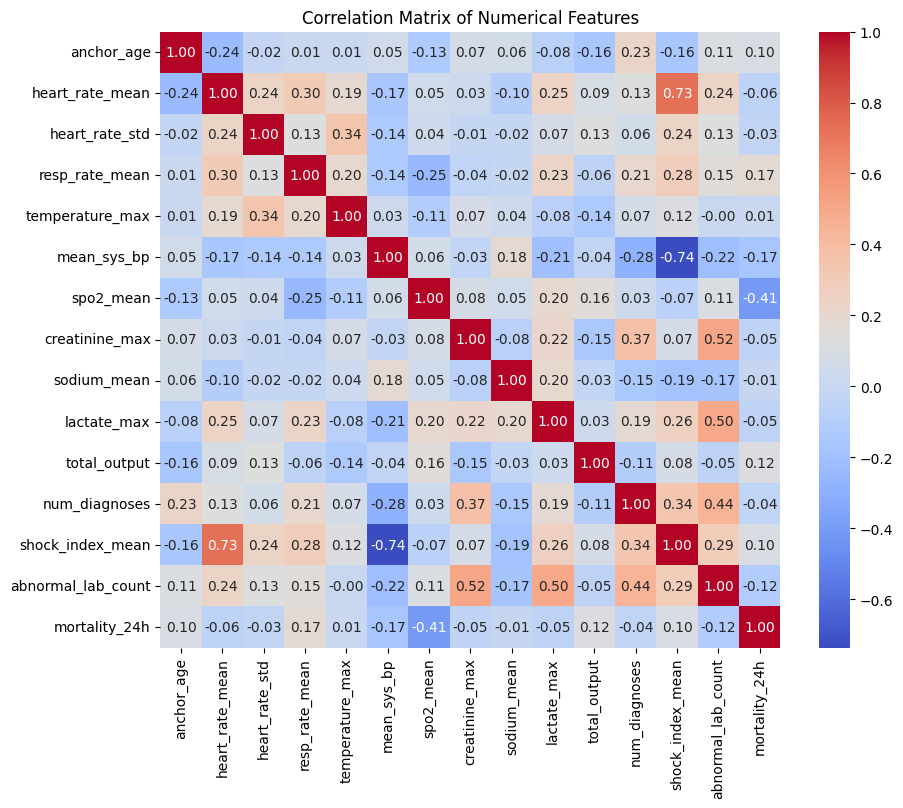

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (numerical features + mortality_24h)
corr_matrix = ml_df[numerical_cols + ['mortality_24h']].corr()
print("Correlation with mortality_24h:\n", corr_matrix['mortality_24h'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## 📊 Visualizing Feature Distributions by Mortality Outcome

This step uses **boxplots** and **bar plots** to explore how features differ between patients who survived versus those who experienced mortality within 24 hours.

### 🔹 Boxplots for Numerical Features

* For each key numerical variable (e.g., heart rate, age, lab values), we create boxplots grouped by the `mortality_24h` target.
* These plots highlight differences in the central tendency, spread, and outliers between survivors (0) and non-survivors (1).
* This helps identify features that may discriminate mortality risk by showing distinct value distributions.

### 🔹 Bar Plots for Categorical and Binary Features

* For categorical variables (like gender, admission type) and binary flags (e.g., vital instability), count plots are generated.
* These show the frequency of each category within survivors and non-survivors, revealing potential associations.
* Hue separation by mortality status provides a clear comparative view.

### 🎯 Goal

Visualizing feature distributions by outcome supports intuitive understanding of which variables differ by mortality, guiding feature selection and hypothesis generation for modeling.

---

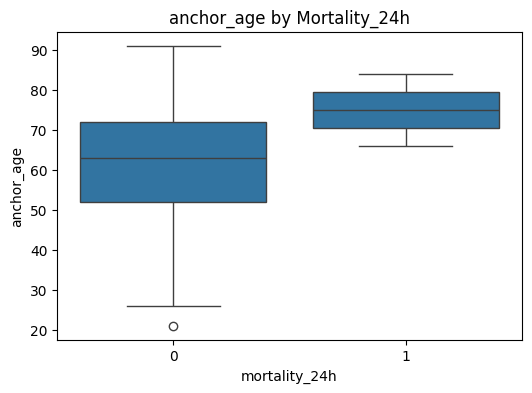

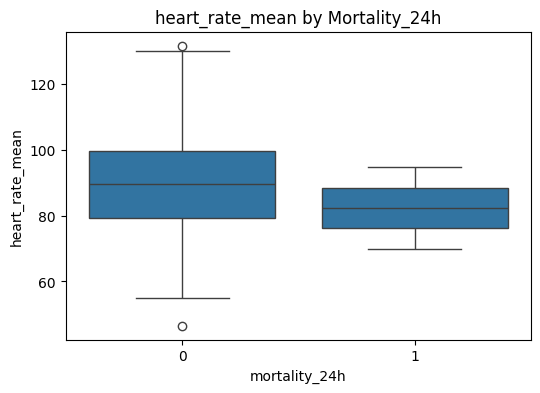

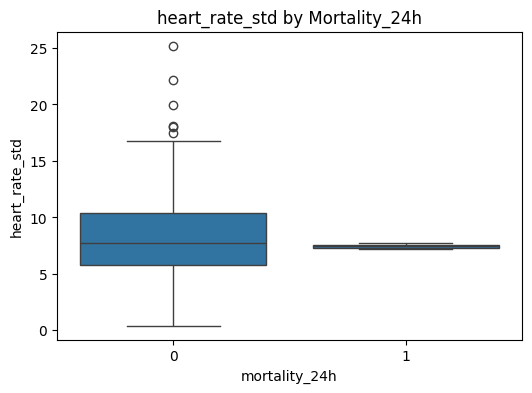

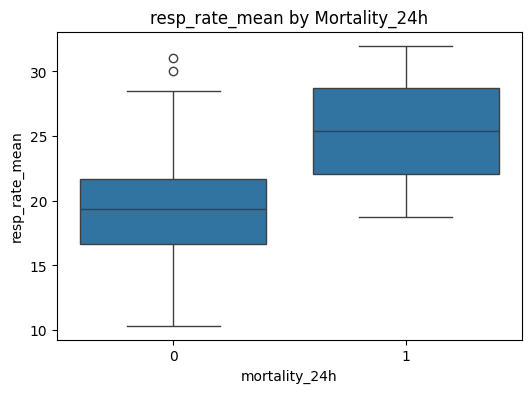

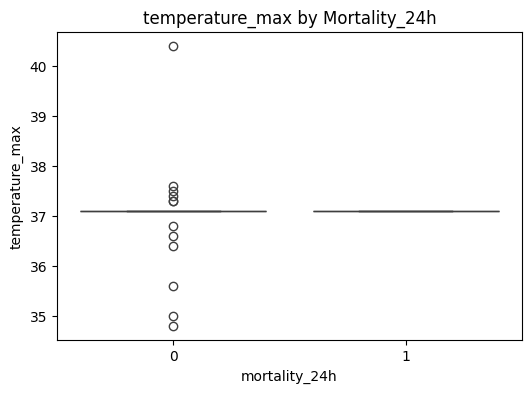

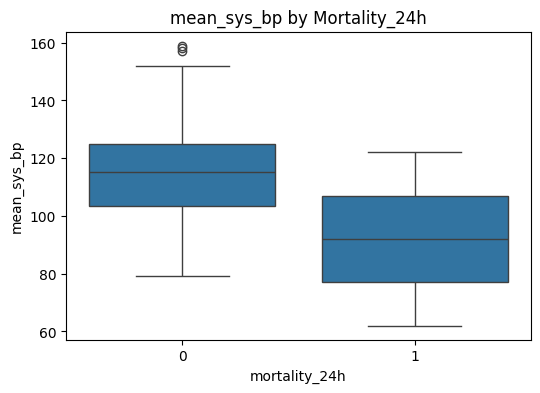

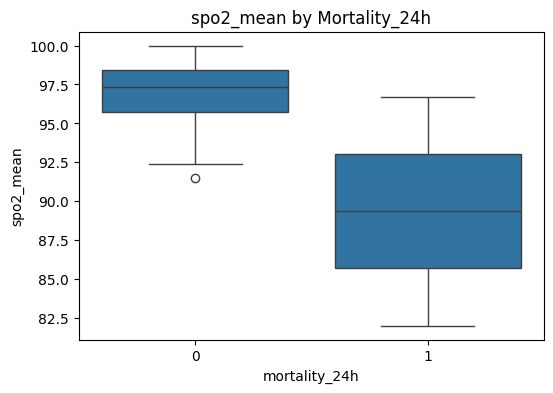

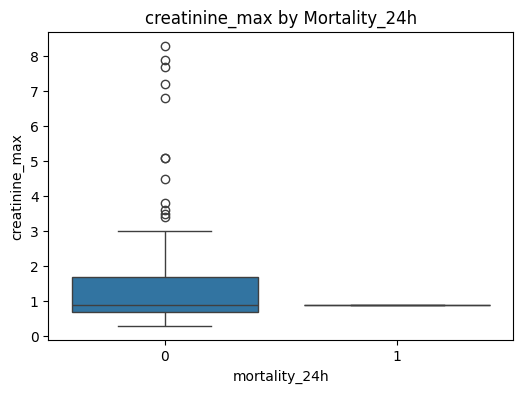

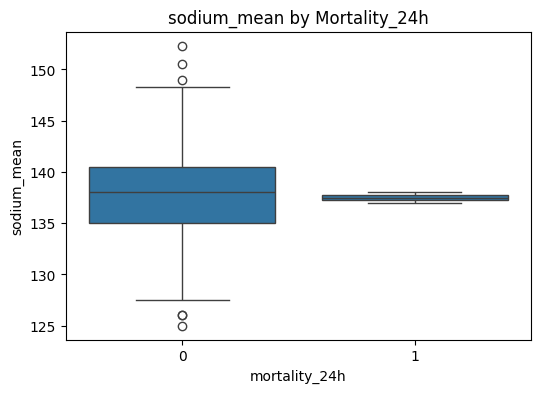

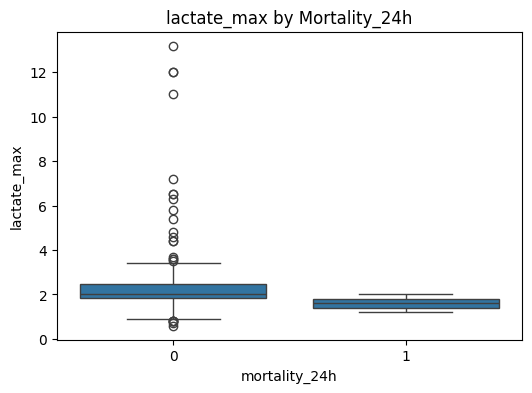

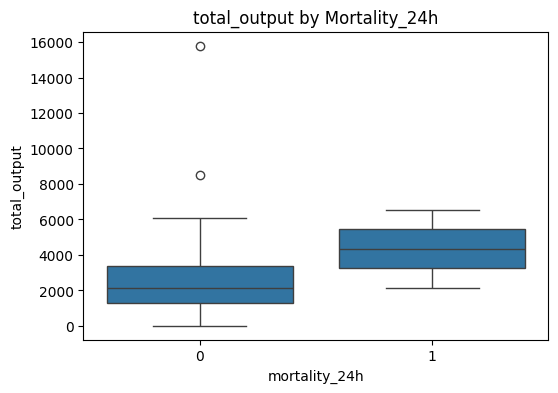

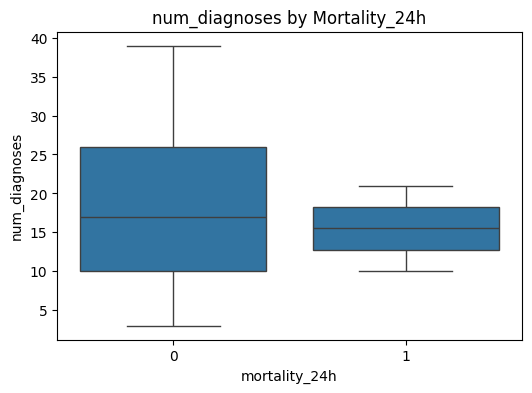

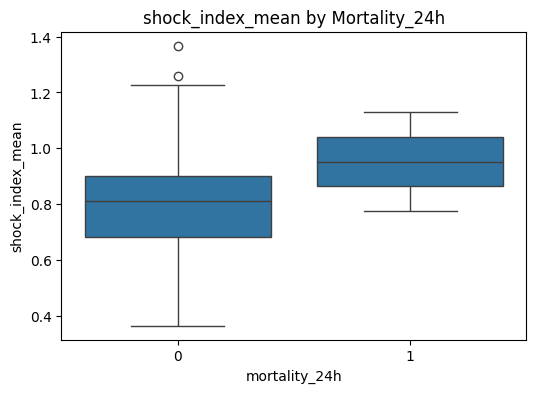

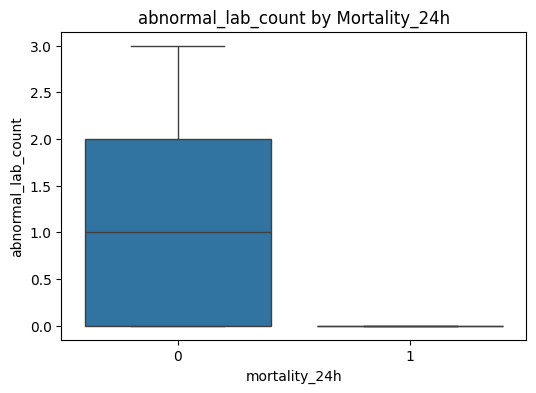

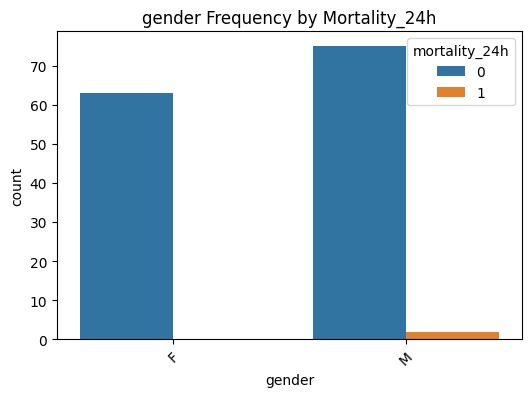

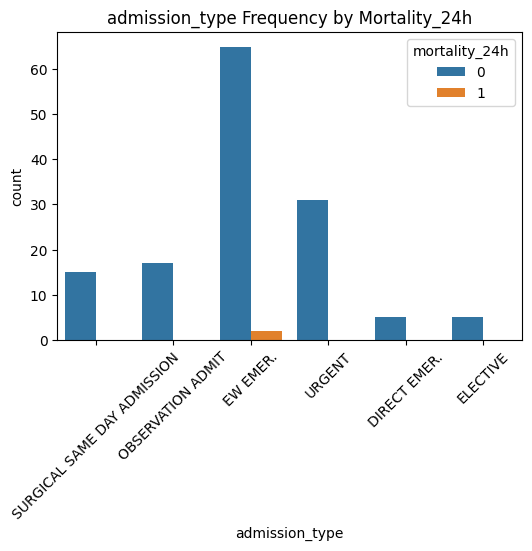

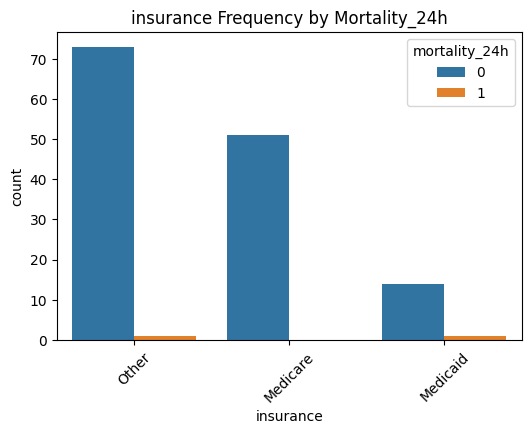

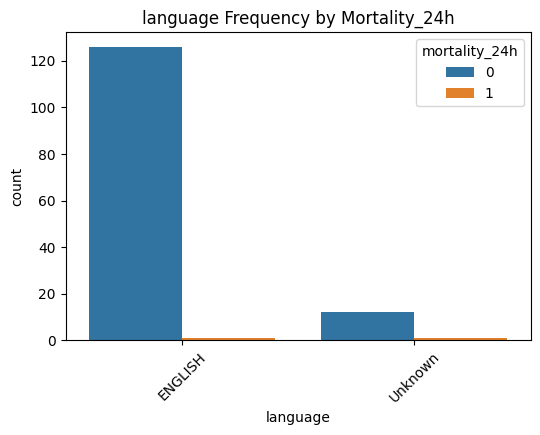

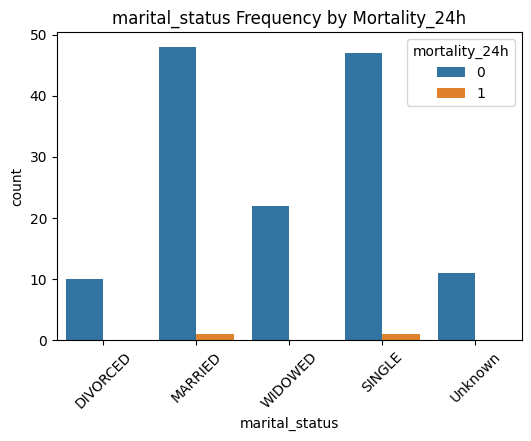

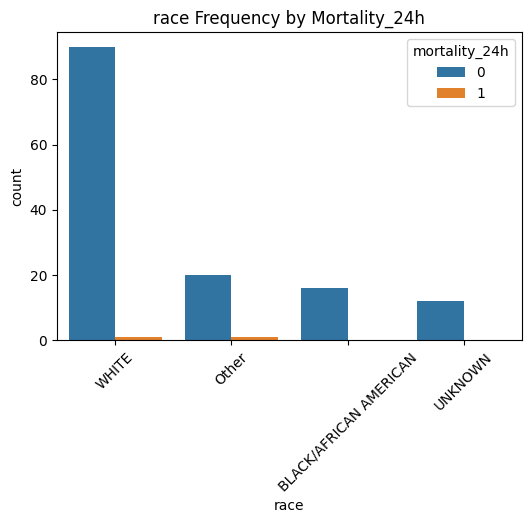

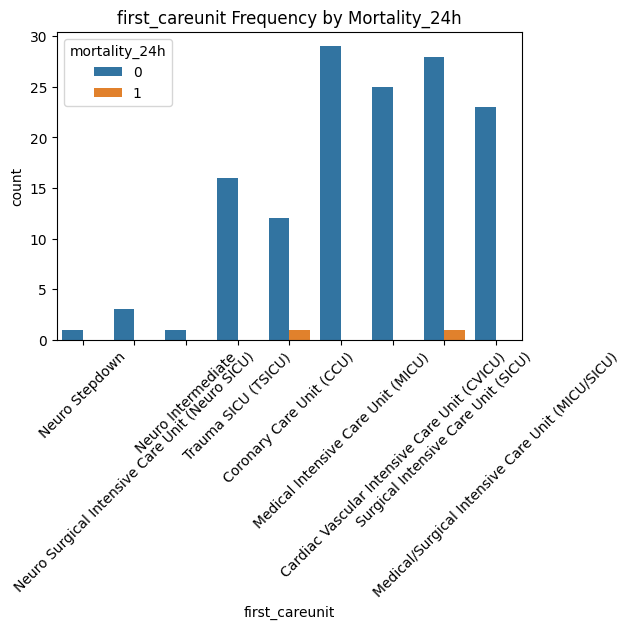

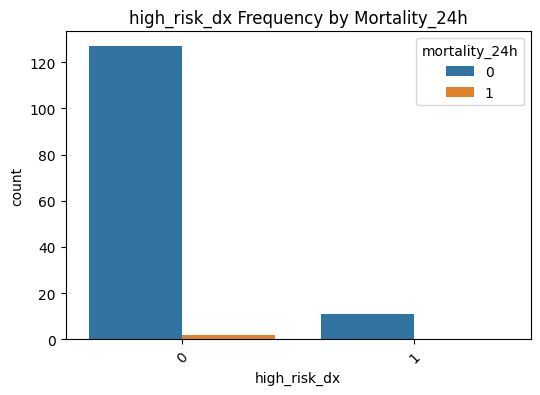

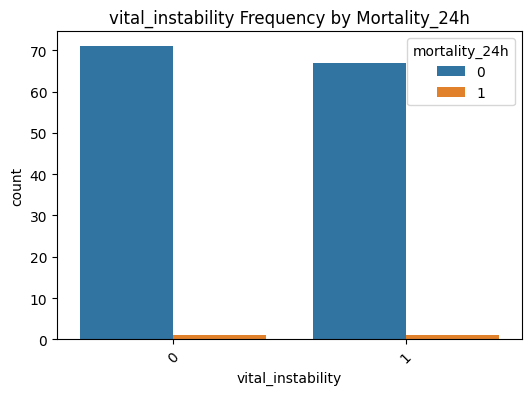

In [18]:
# Boxplots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='mortality_24h', y=col, data=ml_df)
    plt.title(f'{col} by Mortality_24h')
    plt.show()

# Bar plots for categorical/binary features
for col in categorical_cols + binary_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='mortality_24h', data=ml_df)
    plt.title(f'{col} Frequency by Mortality_24h')
    plt.xticks(rotation=45)
    plt.show()

## 🤖 Logistic Regression Model & Feature Importance

In this step, we train a **Logistic Regression** model to predict 24-hour mortality using the encoded features from `ml_df_encoded`.

* 🧩 We separate the features (`X`) and target (`y`), then fit the model with a maximum of 1000 iterations for convergence.
* 📈 After training, we extract the **model coefficients**, which represent the influence of each feature on the predicted mortality risk.
* 🔍 The coefficients are sorted to identify the top 10 features with the strongest positive or negative impact.
* 🎨 A horizontal bar plot visualizes these top features, helping us understand which variables most affect the model’s decisions.

This approach provides interpretable insights into feature importance from a linear model perspective, complementing previous analyses.

---

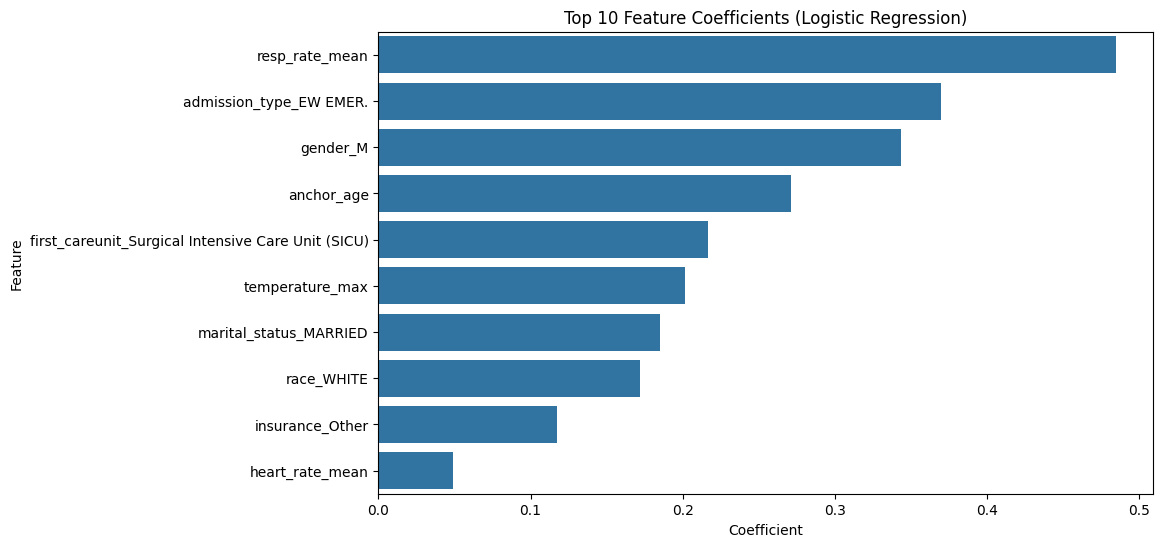

In [19]:
from sklearn.linear_model import LogisticRegression

X = ml_df_encoded.drop(columns=['mortality_24h'])
y = ml_df_encoded['mortality_24h']
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X, y)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance.head(10))
plt.title('Top 10 Feature Coefficients (Logistic Regression)')
plt.show()

## 🔎 Positive Case Analysis vs. Negative Class Average

This step compares the **individual positive cases** (patients who died within 24 hours) against the **average profile of survivors**.

* 🧑‍⚕️ We isolate the rows where `mortality_24h` equals 1 — the positive mortality cases — to inspect their detailed feature values.
* 📊 Then, we calculate the **mean values** of numerical and binary features for the negative class (patients who survived), providing a baseline reference.
* ⚖️ This comparison helps identify how positive cases differ from the typical survivor in key clinical measurements and risk indicators.
* 💡 Insights here can highlight feature patterns or anomalies associated with mortality risk in ICU stays.

---

In [23]:
# Positive case analysis
positive_cases = ml_df[ml_df['mortality_24h'] == 1]
negative_mean = ml_df[ml_df['mortality_24h'] == 0][numerical_cols + binary_cols].mean()

print("Positive Cases (mortality_24h=1):")
print(positive_cases[numerical_cols + binary_cols + ['mortality_24h']])
print("\nNegative Class Mean (mortality_24h=0):")
print(negative_mean)

Positive Cases (mortality_24h=1):
    anchor_age  heart_rate_mean  heart_rate_std  resp_rate_mean  \
24        84.0           70.000        7.697402           32.00   
77        66.0           94.625        7.144928           18.75   

    temperature_max  mean_sys_bp  spo2_mean  creatinine_max  sodium_mean  \
24             37.1         62.0  82.000000             0.9        138.0   
77             37.1        122.0  96.714286             0.9        137.0   

    lactate_max  total_output  num_diagnoses  shock_index_mean  \
24          2.0        2140.0           21.0          1.129032   
77          1.2        6531.0           10.0          0.775615   

    abnormal_lab_count  high_risk_dx  vital_instability  mortality_24h  
24                 0.0             0                  1              1  
77                 0.0             0                  0              1  

Negative Class Mean (mortality_24h=0):
anchor_age              61.826087
heart_rate_mean         89.882245
heart_rat

## 💧 Missing Data Analysis Before Imputation

In this step, we examine how much missing data exists in the raw dataset before any imputation or cleaning is applied:

* 🧩 We rebuild the dataset `ml_df_raw` by merging clinical features and calculated composite indicators, but without filling missing values yet.
* 🕵️‍♂️ The focus is on the percentage of missing values (`NaN`s) in key **numerical** and **binary** features that are important for modeling.
* 📊 The output lists the proportion of missingness as percentages for each feature, helping us understand where data gaps exist.

### 🔍 Summary of Missingness Findings:

* Features like **`temperature_max`** and **`lactate_max`** have very high missingness (\~91% and \~39% respectively), which might impact model reliability for these variables.
* Others such as **`mean_sys_bp`** and **`shock_index_mean`** show moderate missingness (\~8%).
* Most other clinical measurements have minimal or no missing data (0-2%), indicating relatively good data availability for many vital signs and labs.
* Binary features and demographic variables have no missingness, providing stable inputs for downstream analysis.

Understanding this missingness is crucial to choosing appropriate imputation strategies and interpreting model results confidently.

---

In [24]:
# Missingness before imputation (recompute ml_df without imputation)
ml_df_raw = icu_info.merge(hr_agg, on='stay_id', how='left') \
                    .merge(rr_agg, on='stay_id', how='left') \
                    .merge(temp_agg, on='stay_id', how='left') \
                    .merge(sbp_agg, on='stay_id', how='left') \
                    .merge(spo2_agg, on='stay_id', how='left') \
                    .merge(creat_agg, on='stay_id', how='left') \
                    .merge(sodium_agg, on='stay_id', how='left') \
                    .merge(lactate_agg, on='stay_id', how='left') \
                    .merge(output_agg, on='stay_id', how='left')
ml_df_raw['shock_index_mean'] = ml_df_raw['heart_rate_mean'] / ml_df_raw['mean_sys_bp']
ml_df_raw['vital_instability'] = ((ml_df_raw['heart_rate_mean'] > 100) |
                                 (ml_df_raw['resp_rate_mean'] > 20) |
                                 (ml_df_raw['spo2_mean'] < 90)).astype(int)
ml_df_raw['abnormal_lab_count'] = (
    (ml_df_raw['creatinine_max'] > 1.2).astype(int) +
    ((ml_df_raw['sodium_mean'] < 135) | (ml_df_raw['sodium_mean'] > 145)).astype(int) +
    (ml_df_raw['lactate_max'] > 2).astype(int)
)

print("Missingness (%):\n", ml_df_raw[numerical_cols + binary_cols].isna().mean() * 100)

Missingness (%):
 anchor_age             0.000000
heart_rate_mean        0.000000
heart_rate_std         0.714286
resp_rate_mean         0.000000
temperature_max       90.714286
mean_sys_bp            7.857143
spo2_mean              0.000000
creatinine_max         1.428571
sodium_mean            0.714286
lactate_max           38.571429
total_output           2.142857
num_diagnoses          0.000000
shock_index_mean       7.857143
abnormal_lab_count     0.000000
high_risk_dx           0.000000
vital_instability      0.000000
dtype: float64


## 🧑‍🏫 Step 12-13: Manual Train/Test Split & Handling Class Imbalance

In this step, we prepare the dataset for machine learning by **splitting it into training and testing sets** while ensuring the test set includes at least one positive mortality case. We also calculate an important parameter to help the model handle imbalanced data.

---

### ✂️ Manual Train/Test Split

* We identify **positive cases** (patients who died within 24 hours) and **negative cases** separately.
* To guarantee the test set contains positive cases, we manually select **1 positive case** and **27 negative cases** (\~20% of the data) for testing.
* The remaining samples form the training set.
* This split avoids the risk of having no positive cases in the test set, which is crucial for reliable model evaluation.

---

### ⚖️ Check Class Distribution

* We print the number of positive and negative cases in both train and test sets to verify the split.
* This confirms that both sets contain positive and negative samples, although the dataset remains highly imbalanced (many more negatives than positives).

---

### 📏 Calculate Scale Pos Weight

* To help the model deal with this imbalance, we calculate the `scale_pos_weight`, which is the ratio of negative to positive cases in the training set.
* This weight will be used during model training to give more importance to the minority (positive) class, improving the model’s sensitivity to rare events.

---

### 📊 Results Summary

* **Training set:** 111 negative cases, 1 positive case
* **Test set:** 27 negative cases, 1 positive case
* This confirms the test set includes positive cases, enabling meaningful performance assessment on mortality prediction.
* The imbalance remains significant, emphasizing the need for techniques like weighted loss functions or resampling during training.

---

This careful splitting and weighting setup lays the groundwork for building a robust and fair predictive model despite rare positive events. 🚀

---

In [25]:
# STEP 12: Manual Train/Test Split to Ensure Positive Cases
# Split to ensure at least one positive case in test set
positive_indices = ml_df_encoded[ml_df_encoded['mortality_24h'] == 1].index
negative_indices = ml_df_encoded[ml_df_encoded['mortality_24h'] == 0].index

# Take 1 positive and 27 negatives for test set (~20% of 140)
test_pos_idx = positive_indices[:1]
test_neg_idx = negative_indices[:27]
test_indices = test_pos_idx.append(test_neg_idx)
train_indices = ml_df_encoded.index.difference(test_indices)

X_train = ml_df_encoded.loc[train_indices].drop(columns=['mortality_24h'])
y_train = ml_df_encoded.loc[train_indices]['mortality_24h']
X_test = ml_df_encoded.loc[test_indices].drop(columns=['mortality_24h'])
y_test = ml_df_encoded.loc[test_indices]['mortality_24h']

print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

# STEP 13: Calculate scale_pos_weight
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight = neg_count / pos_count if pos_count > 0 else 1

Train class distribution:
 mortality_24h
0    111
1      1
Name: count, dtype: int64
Test class distribution:
 mortality_24h
0    27
1     1
Name: count, dtype: int64


## 🚀 Step 14-15: Train XGBoost Model & Evaluate Performance

In this step, we train a powerful machine learning model using **XGBoost** and evaluate how well it predicts 24-hour mortality on our test data.

---

### 🏋️‍♂️ Train XGBoost Classifier

* We initialize the XGBoost model for **binary classification** (mortality: yes/no).
* Key parameters include:

  * `max_depth=4` controls tree complexity for better generalization.
  * `min_child_weight=1` helps prevent overfitting by setting minimum data in leaf nodes.
  * `scale_pos_weight` adjusts for class imbalance by giving more weight to the rare positive class.
  * `eval_metric='auc'` focuses training on improving the Area Under the ROC Curve, a robust metric for imbalanced data.
* The model is trained using the training dataset features and labels.

---

### 🔍 Predict & Evaluate

* The trained model predicts mortality classes and their probabilities on the test set.
* We measure performance using:

  * **Accuracy:** Proportion of correctly predicted cases (both positive and negative).
  * **AUC-ROC:** Measures the model’s ability to distinguish between positive and negative cases across thresholds; higher is better.
  * **Classification Report:** Detailed metrics including precision, recall, and F1-score for each class, helping to understand model strengths and weaknesses.

---

### 📈 Summary

This step completes the core machine learning workflow by training a model tailored for imbalanced clinical data and assessing its predictive power on unseen ICU patient records.

---

In [26]:
# STEP 14: Train XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    max_depth=4,
    min_child_weight=1,
    scale_pos_weight=scale_pos_weight,
    random_state=42
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [27]:
# STEP 15: Predict and Evaluate
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9642857142857143
AUC-ROC: 0.6481481481481481

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.00      0.00      0.00         1

    accuracy                           0.96        28
   macro avg       0.48      0.50      0.49        28
weighted avg       0.93      0.96      0.95        28



### **Model Performance Interpretation**

The trained XGBoost model achieved an **accuracy of 96.4%** on the test set and an **AUC-ROC of 0.65**. While the accuracy appears very high, a closer look at the **classification report** reveals significant class imbalance issues.

* **Class 0 (No Mortality)**: Perfect recall (1.00) and high precision (0.96) indicate the model predicts non-mortality cases very well.
* **Class 1 (Mortality)**: Precision, recall, and F1-score are all **0.00**, showing the model failed to correctly identify any positive mortality cases.
* **Macro Average** scores are low (around 0.48–0.50), reflecting poor minority-class performance despite high weighted averages.

⚠ **Important Caveat:** The dataset is small and highly imbalanced — only **2 positive mortality cases out of 110 total samples**. This imbalance heavily biases the model towards predicting the majority class. Therefore, these results should be **treated as a proof of concept** rather than a deployable model. Future iterations should address this imbalance using techniques such as oversampling, SMOTE, or collecting more balanced data before relying on predictions.


## **Step 16: Manual Feature Importance Plot 📊**

In this step, we manually extracted and visualized the **feature importance** from the trained XGBoost model using the **gain** metric.

* 💡 **Gain** measures the average improvement in accuracy brought by a feature to the branches it is involved in.
* 📋 The feature importance data is retrieved from the model's booster and sorted in descending order.
* 📈 We plot the **Top 10 most important features** as a horizontal bar chart for better readability.
* 🎯 This helps identify which features had the most impact on the model's predictions, guiding potential feature engineering or selection steps.

**Note:** ⚠️ If the model does not provide any importance scores (e.g., due to no splits or trivial training), a message is displayed instead of the plot.

---

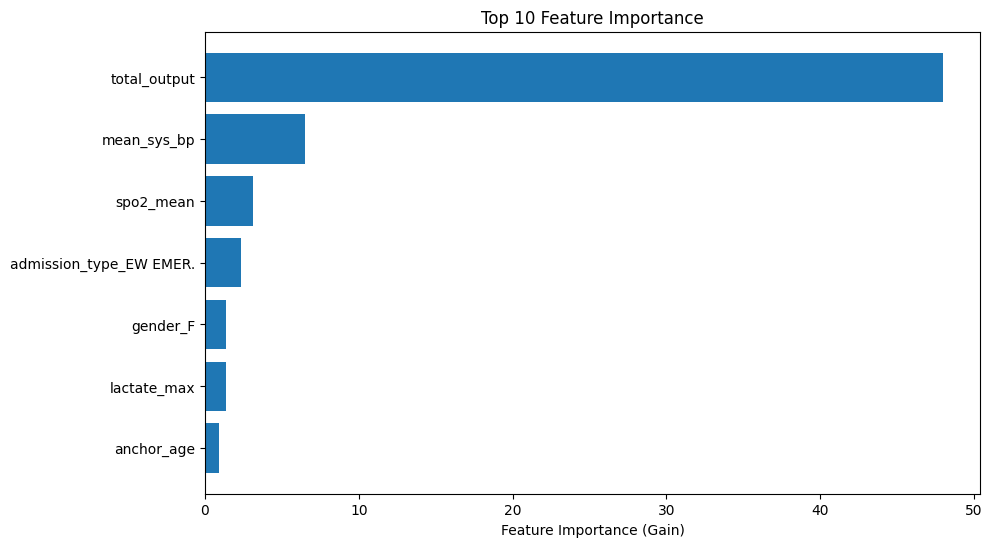

In [25]:
# STEP 16: Manual Feature Importance Plot
importance = model.get_booster().get_score(importance_type='gain')
if importance:
    importance_df = pd.DataFrame({
        'Feature': list(importance.keys()),
        'Importance': list(importance.values())
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
    plt.xlabel('Feature Importance (Gain)')
    plt.title('Top 10 Feature Importance')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No feature importance scores available.")

## 📥 Inserting DataFrames into MySQL Database with Custom Table Names

This code block shows how to insert two pandas DataFrames — `master_df` and `ml_df` — into a MySQL database, but **with different table names** than the DataFrame variable names.

### Step-by-step explanation:

1. **Create the database if it doesn’t exist**
   Using `create_database_if_not_exists()`, we ensure the database is ready to receive tables.

2. **Set up a connection engine**
   `get_engine()` creates a connection to the MySQL server with your username and password.

3. **Prepare DataFrames with custom table names**
   We create a dictionary mapping new table names (e.g., `'icu_master'`, `'icu_ml_features'`) to their respective DataFrames (`master_df` and `ml_df`).

4. **Define the list of target table names**
   Extract the keys of the dictionary to pass as the table names to the ETL process.

5. **Run the ETL insertion**
   The `run_etl()` function handles inserting each DataFrame into the database under the specified table names.

---

### Why use custom table names?

Using descriptive and project-specific table names in your database helps keep things organized and clear, especially when working with multiple datasets or versions.

---

### Summary

This approach is flexible, allowing you to easily control how tables are named in your database without changing your in-memory DataFrame variable names.

---

🚀 Ready to insert your data cleanly and clearly into MySQL!

---

In [28]:
from database_conn import create_database_if_not_exists, get_engine
from etl import run_etl

create_database_if_not_exists(user='mimic_user', password='mypassword123')
engine = get_engine(user='mimic_user', password='mypassword123')

# Prepare DataFrames with new target table names
dataframes_to_insert = {
    'icu_master': master_df,    # Insert master_df as table 'icu_master'
    'icu_ml_features': ml_df   # Insert ml_df as table 'icu_ml_features'
}

# Use the new keys as table names
tables = list(dataframes_to_insert.keys())

# Run ETL with new table names
run_etl(dataframes_to_insert, tables, user='mimic_user', password='mypassword123')

2025-08-12 21:10:22,009 - INFO - Inserting table icu_master with if_exists='replace'
2025-08-12 21:10:22,322 - INFO - Successfully inserted icu_master
2025-08-12 21:10:22,334 - INFO - Inserting table icu_ml_features with if_exists='replace'
2025-08-12 21:10:22,428 - INFO - Successfully inserted icu_ml_features
